In [1]:
import pandas as pd
import polars as plr
import pickle
import gc
import math
import scann
import pyreadstat as pr
import streamlit as stlit
import pyarrow.parquet as pa
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.cluster import KMeans, OPTICS
import matplotlib.pyplot as plt
#import ipywidgets as wig
pd.set_option('display.max_colwidth', None)

2024-01-02 17:00:58.652506: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-02 17:00:58.953364: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-02 17:00:58.955163: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-02 17:01:00.180100: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Read and Explore the Data Structure and Size

In [2]:
#reader = pr.read_file_in_chunks(pr.read_sav, 'misc2020.SAV', chunksize=500000, multiprocess=True, num_processes=32)

In [3]:
#df = pd.read_csv("bestand2_seun_2011_1.csv", delimiter=';', engine='python')

In [4]:
##df = plr.read_csv("data/bestand2_seun_2020_*.csv", separator=';', ignore_errors=True)

In [5]:
dff = plr.read_parquet("all_2020_data.parquet")

In [6]:
out = dff.select(
    [
    plr.col('SBI2008VJJJJ').apply(lambda x: '0'if x==" " else x),
    plr.col('SBISELFEMPLOYED').apply(lambda x: '0'if x=="" or  x==" " else x),
    plr.col('SBI2008VPBL38').apply(lambda x: '0'if x==" " else x),
    plr.col('SBI2008VPBL4').apply(lambda x: '0'if x==" " else x),
    plr.col('SBI2008VPBL10').apply(lambda x: '0'if x==" " else x),
    plr.col('SBI2008VPBL21').apply(lambda x: '0'if x==" " else x),
    plr.exclude(['SBI2008VJJJJ', 'SBISELFEMPLOYED', 'SBI2008VPBL38', 'SBI2008VPBL4', 'SBI2008VPBL10', 'SBI2008VPBL21'])
    ]
)

In [7]:
out = out.select(
    [
    plr.col('SBI2008VJJJJ').cast(plr.Int32),
    plr.col('SBISELFEMPLOYED').cast(plr.Int32),
    plr.col('SBI2008VPBL38').cast(plr.Int32),
    plr.col('SBI2008VPBL4').cast(plr.Int32),
    plr.col('SBI2008VPBL10').cast(plr.Int32),
    plr.col('SBI2008VPBL21').cast(plr.Int32),
    plr.exclude(['SBI2008VJJJJ', 'SBISELFEMPLOYED', 'SBI2008VPBL38', 'SBI2008VPBL4', 'SBI2008VPBL10', 'SBI2008VPBL21'])
    ]
)


In [8]:
del dff

In [9]:
#df_samp = df.sample(n=500000, shuffle=True, seed=12)

In [10]:
df_pan = out.to_pandas()

In [11]:
#df =  pa.read_table("all_2020_data.parquet")

In [12]:
del out

In [13]:
with open("var_dict.cpkl", 'rb') as f:
    dictionary = pickle.load(f)

In [14]:
dictionary = {k: v for k, v in dictionary.items() if v is not None}

In [15]:
for col in df_pan.get_columns():
    print(f'{col.name} - {col.is_null().sum()}')

AttributeError: 'DataFrame' object has no attribute 'get_columns'

In [ ]:
#plr.Config.set_fmt_str_lengths(100)

In [ ]:
[dictionary[x] for x in ['SIMDATUM1', 'SIMDATUM2', 'GBAGESLACHT', 'LFTENQ1', 'LFTENQ2', 'MIGRATIEACHTERGROND', 'TYPHH1', 'TYPHH2', 'PLHH1', 'PLHH2', 'AANTALPERSHH1', 'AANTALPERSHH2', 'AANTALKINDHH1', 'AANTALKINDHH2', 'SBI1', 'SBI2', 'SMODELRAMINGPF1', 'SMODELRAMINGPF2', 'SMODELRAMINGPENSIOENPREMIEWG1', 'SMODELRAMINGPENSIOENPREMIEWG2', 'SMODELRAMINGPENSIOENPREMIEWN1', 'SMODELRAMINGPENSIOENPREMIEWN2', 'DATAAVAILABLE2019', 'INPSECJ2019', 'OCCUPATION2019', 'OCCUPATION_BIN2019', 'INPZELFSTANDIGEPL12019', 'INPTYPZLF2019', 'SBISELFEMPLOYED2019', 'INPPN700PEN2019', 'INPPG710PEN2019', 'INPPH770OUP2019', 'INPPH570ZWP2019', 'INPPINK2019', 'INPPERSPRIM2019', 'INPPERSINK2019', 'INPPERSBRUT2019', 'TYPHH2019', 'PLHH2019', 'INHSAMHH2019', 'MAINBREADWINNER2019', 'AANTALPERSHH2019', 'AANTALKINDHH2019', 'GBABURGSTNWKLASSE42019', 'VEHP100HVERM2019', 'VEHP100HVERMKL12019', 'VEHWVEREXEWH2019', 'VEHW1000VERH2019', 'VEHW1100BEZH2019', 'VEHW1110FINH2019', 'VEHW1111BANH2019', 'VEHW1112EFFH2019', 'SECURITIESBIN2019', 'SECURITIESPERC2019', 'VEHW1120ONRH2019', 'VEHW1121WONH2019', 'VEHW1122OGOH2019', 'VEHW1130ONDH2019', 'VEHW1140ABEH2019', 'VEHW1150OVEH2019', 'VEHW1200STOH2019', 'VEHW1210SHYH2019', 'VEHW1220SSTH2019', 'VEHW1230SOVH2019', 'INHEHALGR2019', 'HOMEOWNER2019', 'INHP100HGEST2019', 'INHP100HGESTKL12019', 'INHGESTINKH2019', 'OPLNIVSOI2016AGG1HBMETNIRWO2019', 'OPLNIVSOI2016AGG2HBMETNIRWO2019', 'OPLNIVSOI2016AGG4HBMETNIRWO2019', 'INPPOSHHK2019', 'INHBBIHJ2019', 'GBABURGSTNWKLASSE42020', 'INPSECJ2020', 'INPPN700PEN2020', 'INPPG710PEN2020', 'INPPH770OUP2020', 'INPPH570ZWP2020', 'INPPINK2020', 'INPPERSPRIM2020', 'INPPERSINK2020', 'INPPERSBRUT2020', 'INPT2070WIN2020', 'INPT1068ZVW2020', 'INPT1060OVE2020', 'INPT1040NAT2020', 'INPT1030DGN2020', 'INPT1020AMB2020', 'INPT1000WER2020', 'INPPG610WAO2020', 'INPPG410WW2020', 'TYPHH2020', 'PLHH2020', 'INHSAMHH2020', 'AANTALPERSHH2020', 'AANTALKINDHH2020', 'VEHWVEREXEWH2020', 'VEHW1000VERH2020', 'VEHW1100BEZH2020', 'VEHW1110FINH2020', 'VEHW1111BANH2020', 'VEHW1112EFFH2020', 'VEHW1120ONRH2020', 'VEHW1121WONH2020', 'VEHW1122OGOH2020', 'VEHW1130ONDH2020', 'VEHW1140ABEH2020', 'VEHW1150OVEH2020', 'VEHW1200STOH2020', 'VEHW1210SHYH2020', 'VEHW1220SSTH2020', 'VEHW1230SOVH2020', 'INHEHALGR2020', 'INPPOSHHK2020', 'INHGESTINKH2020', 'INHBBIHJ2020', 'INHPOPIIV2020', 'INHPRIMINKH2020', 'OPLNIVSOI2016AGG1HB2020', 'OPLNIVSOI2016AGG2HB2020', 'CTO2016V2020', 'SMODELRAMINGPF2020', 'SMODELRAMINGPENSIOENPREMIEWG2020', 'SMODELRAMINGPENSIOENPREMIEWN2020', 'INPPN400WW2020', 'INPSBI2008V2020', 'SBI2008VJJJJ2020', 'SBISELFEMPLOYED2020', 'SBI2008VPBL42020', 'SBI2008VPBL102020', 'SBI2008VPBL212020', 'SBI2008VPBL382020', 'AMREGIO2020', 'COROP2020', 'PROVINCIE2020', 'STEDGEM2020', 'GEM20202020', 'G42020', 'G322020', 'LANDSDEEL2020', 'STEDBUURT2020', 'IKVIDHBAAN2020', 'SOORTOBJECTNUMMER2020', 'RINOBJECTNUMMER2020']]

### NB: Check that INPPG710PEN2020 and SMODELRAMINGPENSIOENPREMIEWG2020 are exactly the same

In [16]:
df_pan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17403068 entries, 0 to 17403067
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SBI2008VJJJJ                  int32  
 1   SBISELFEMPLOYED               int32  
 2   SBI2008VPBL38                 int32  
 3   SBI2008VPBL4                  int32  
 4   SBI2008VPBL10                 int32  
 5   SBI2008VPBL21                 int32  
 6   RINPERSOON                    int64  
 7   year                          int64  
 8   GBABURGSTNWKLASSE4            object 
 9   INPSECJ                       object 
 10  OCCUPATION                    object 
 11  OCCUPATION_BIN                object 
 12  INPPN700PEN                   float64
 13  INPPG710PEN                   float64
 14  INPPH770OUP                   float64
 15  INPPH570ZWP                   float64
 16  INPPINK                       object 
 17  INPPERSPRIM                   float64
 18  INPPERSINK          

#### Set index as rinpersoon (For some reason this is hard for the system to compute without running out of memory)

In [ ]:
#df_pan.set_index('RINPERSOON')

#### Removing riinobjectnummer, sortobjectnummer, ikvidhbaan, g32, 

In [17]:
#df_pan_bac = df_pan.copy(deep=True)

In [16]:
df_pan =  df_pan.loc[:,~df_pan.columns.isin(['year', 'OCCUPATION', 'OCCUPATION_BIN', 'OPLNIVSOI2016AGG2HB', 'IKVIDHBAAN', 'RINOBJECTNUMMER', 'G32', 'SOORTOBJECTNUMMER', 'SBI2008VPBL4', 'SBI2008VPBL10', 'SBI2008VPBL21'])]

#### Residual polars code for data cleaning ........ ignore!! for now

In [ ]:
df.select(plr.col(['INPPG710PEN'])).to_series().value_counts()

In [ ]:
df = plr.concat([df.select(plr.col(plr.Int64)).interpolate().select(plr.exclude(['RINPERSOON', 'year'])), df.select(plr.col(plr.Utf8)).select([plr.exclude(['OCCUPATION', 'OCCUPATION_BIN', 'OPLNIVSOI2016AGG2HB', 'IKVIDHBAAN', 'RINOBJECTNUMMER', 'G32', 'SOORTOBJECTNUMMER'])])], how="horizontal")

In [ ]:
df = df.fill_null(strategy="forward")

In [ ]:
df =  df.filter(plr.all(plr.col(plr.Float32, plr.Float64).is_not_nan()))

In [ ]:
#df.select(plr.col(plr.Utf8)).select([plr.exclude(['OCCUPATION', 'OCCUPATION_BIN', 'OPLNIVSOI2016AGG2HB', 'IKVIDHBAAN', 'RINOBJECTNUMMER', 'G32', 'SOORTOBJECTNUMMER'])])

In [17]:
def read_n_plot(data):
    return df.select(plr.col([data])).to_series()

In [18]:
df.describe()

shape: (7, 68)
┌─────────┬───────────┬───────────┬───────────┬───┬────────────┬────────────┬────────────┬─────────┐
│ describ ┆ INPPN700P ┆ INPPG710P ┆ INPPH770O ┆ … ┆ SBI2008VPB ┆ SBI2008VPB ┆ SBI2008VPB ┆ STEDBUU │
│ e       ┆ EN        ┆ EN        ┆ UP        ┆   ┆ L10        ┆ L21        ┆ L38        ┆ RT      │
│ ---     ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---     │
│ str     ┆ f64       ┆ f64       ┆ f64       ┆   ┆ str        ┆ str        ┆ str        ┆ str     │
╞═════════╪═══════════╪═══════════╪═══════════╪═══╪════════════╪════════════╪════════════╪═════════╡
│ count   ┆ 1.7403068 ┆ 1.7403068 ┆ 1.7403068 ┆ … ┆ 17403068   ┆ 17403068   ┆ 17403068   ┆ 1740306 │
│         ┆ e7        ┆ e7        ┆ e7        ┆   ┆            ┆            ┆            ┆ 8       │
│ null_co ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0          ┆ 0          ┆ 0          ┆ 0       │
│ unt     ┆           ┆           ┆           ┆   ┆            ┆            ┆            ┆         │
│ mean    ┆ 753.09497 ┆ 1482.1431 ┆ 69.899002 ┆ … ┆ null       ┆ null       ┆ null       ┆ null    │
│         ┆ 7         ┆ 86        ┆           ┆   ┆            ┆            ┆            ┆         │
│ std     ┆ 1403.2498 ┆ 2816.9119 ┆ 1669.6610 ┆ … ┆ null       ┆ null       ┆ null       ┆ null    │
│         ┆ 38        ┆ 8         ┆ 54        ┆   ┆            ┆            ┆            ┆         │
│ min     ┆ 0.0       ┆ 0.0       ┆ -52658.0  ┆ … ┆            ┆            ┆            ┆ 9       │
│ max     ┆ 7165.0    ┆ 19581.0   ┆ 486688.0  ┆ … ┆ 10         ┆ 21         ┆ 38         ┆ Very    │
│         ┆           ┆           ┆           ┆   ┆            ┆            ┆            ┆ urban   │
│ median  ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ null       ┆ null       ┆ null       ┆ null    │
└─────────┴───────────┴───────────┴───────────┴───┴────────────┴────────────┴────────────┴─────────┘

In [31]:
df_samp = df.sample(n=50000, shuffle=True, seed=12)

In [37]:
df_work = df_samp.filter(plr.any(plr.col('INPPG710PEN') > 0))

<AxesSubplot:xlabel='INPPG710PEN', ylabel='Count'>

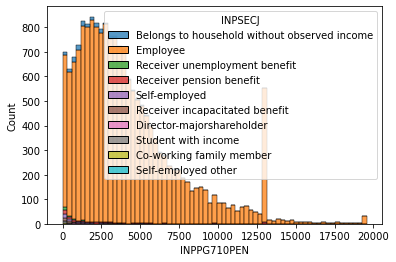

In [38]:
sns.histplot(df_work, x='INPPG710PEN', hue= "INPSECJ", multiple="stack")

In [40]:
df_work.filter(plr.col("INPSECJ") == "Self-employed")

shape: (47, 67)
┌───────────┬───────────┬───────────┬───────────┬───┬────────────┬────────────┬────────────┬─────────┐
│ INPPN700P ┆ INPPG710P ┆ INPPH770O ┆ INPPH570Z ┆ … ┆ SBI2008VPB ┆ SBI2008VPB ┆ SBI2008VPB ┆ STEDBUU │
│ EN        ┆ EN        ┆ UP        ┆ WP        ┆   ┆ L10        ┆ L21        ┆ L38        ┆ RT      │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---     │
│ i64       ┆ i64       ┆ i64       ┆ i64       ┆   ┆ str        ┆ str        ┆ str        ┆ str     │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪════════════╪════════════╪════════════╪═════════╡
│ 562       ┆ 1048      ┆ 4800      ┆ 0         ┆ … ┆ 09         ┆ 17         ┆ 34         ┆ Little  │
│           ┆           ┆           ┆           ┆   ┆            ┆            ┆            ┆ urban   │
│ 24        ┆ 46        ┆ 0         ┆ 0         ┆ … ┆            ┆            ┆            ┆ Extreme │
│           ┆           ┆           ┆           ┆   ┆            ┆            ┆            ┆ ly      │
│           ┆           ┆           ┆           ┆   ┆            ┆            ┆            ┆ urban   │
│ 6         ┆ 10        ┆ 2400      ┆ 0         ┆ … ┆ 04         ┆ 07         ┆ 19         ┆ Extreme │
│           ┆           ┆           ┆           ┆   ┆            ┆            ┆            ┆ ly      │
│           ┆           ┆           ┆           ┆   ┆            ┆            ┆            ┆ urban   │
│ 737       ┆ 1374      ┆ 6219      ┆ 0         ┆ … ┆ 09         ┆ 17         ┆ 33         ┆ Reasona │
│           ┆           ┆           ┆           ┆   ┆            ┆            ┆            ┆ bly     │
│           ┆           ┆           ┆           ┆   ┆            ┆            ┆            ┆ urban   │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …          ┆ …          ┆ …          ┆ …       │
│ 137       ┆ 255       ┆ 0         ┆ 0         ┆ … ┆            ┆            ┆            ┆ Very    │
│           ┆           ┆           ┆           ┆   ┆            ┆            ┆            ┆ urban   │
│ 1442      ┆ 2689      ┆ 0         ┆ 0         ┆ … ┆ 09         ┆ 16         ┆ 32         ┆ Little  │
│           ┆           ┆           ┆           ┆   ┆            ┆            ┆            ┆ urban   │
│ 401       ┆ 749       ┆ 0         ┆ 0         ┆ … ┆            ┆            ┆            ┆ Reasona │
│           ┆           ┆           ┆           ┆   ┆            ┆            ┆            ┆ bly     │
│           ┆           ┆           ┆           ┆   ┆            ┆            ┆            ┆ urban   │
│ 895       ┆ 2769      ┆ 1840      ┆ 0         ┆ … ┆            ┆            ┆            ┆ Extreme │
│           ┆           ┆           ┆           ┆   ┆            ┆            ┆            ┆ ly      │
│           ┆           ┆           ┆           ┆   ┆            ┆            ┆            ┆ urban   │
└───────────┴───────────┴───────────┴───────────┴───┴────────────┴────────────┴────────────┴─────────┘

In [ ]:
dictionary

## Missing values -- remove those with less than 1% missing values

In [17]:
gc.collect()

788

In [18]:
nulies = df_pan.isnull().sum().sort_values(ascending=False) / len(df_pan) *100
nulies[nulies.values > 0]

SMODELRAMINGPENSIOENPREMIEWN    55.501536
SMODELRAMINGPENSIOENPREMIEWG    55.501536
VEHW1112EFFH                     0.852557
VEHW1130ONDH                     0.852557
VEHW1000VERH                     0.852557
VEHW1100BEZH                     0.852557
VEHW1110FINH                     0.852557
VEHW1111BANH                     0.852557
VEHW1120ONRH                     0.852557
VEHW1121WONH                     0.852557
VEHW1122OGOH                     0.852557
VEHW1150OVEH                     0.852557
VEHW1140ABEH                     0.852557
INPPG610WAO                      0.852557
VEHW1200STOH                     0.852557
VEHW1210SHYH                     0.852557
VEHW1220SSTH                     0.852557
VEHW1230SOVH                     0.852557
INHGESTINKH                      0.852557
INHPRIMINKH                      0.852557
INPPG410WW                       0.852557
VEHWVEREXEWH                     0.852557
INPT1000WER                      0.852557
INPT1060OVE                      0

In [19]:
df_pan.shape

(17403068, 68)

In [20]:
df_pan.dropna(subset=nulies[(nulies.values < 1) & (nulies.values > 0)].keys(), inplace=True)

/tmp/ipykernel_2300/27174769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pan.dropna(subset=nulies[(nulies.values < 1) & (nulies.values > 0)].keys(), inplace=True)


In [21]:
df_pan.shape

(17253972, 68)

### Now only pension contribution employee and employer remain (likely self employed and minors and similar non employed individual) we set nan to 0

In [22]:
dictionary['SMODELRAMINGPENSIOENPREMIEWG2020']

'Pension Contribution Employer'

In [23]:
df_pan[['SMODELRAMINGPENSIOENPREMIEWG']].fillna(value=0, inplace=True)
df_pan[['SMODELRAMINGPENSIOENPREMIEWN']].fillna(value=0, inplace=True)

/tmp/ipykernel_2300/2290179359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pan[['SMODELRAMINGPENSIOENPREMIEWG']].fillna(value=0, inplace=True)
/tmp/ipykernel_2300/2290179359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pan[['SMODELRAMINGPENSIOENPREMIEWN']].fillna(value=0, inplace=True)


In [24]:
df_pan.loc[(df_pan['SMODELRAMINGPENSIOENPREMIEWG'] > 0)].shape

(6556341, 68)

## Take a look at each variable

In [151]:
df_pan.shape

(17253972, 68)

### Heuristic if value counts of a variable is less than 20 it is categorical

In [26]:
for col in df_pan.columns:
    if (df_pan[col].dtype=="O"):
        df_pan[col] = pd.Categorical(df_pan[col])
    if (len(df_pan[col].unique()) <= 20):
        df_pan[col] = pd.Categorical(df_pan[col])

/tmp/ipykernel_2300/2470544284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pan[col] = pd.Categorical(df_pan[col])
/tmp/ipykernel_2300/2470544284.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pan[col] = pd.Categorical(df_pan[col])
/tmp/ipykernel_2300/2470544284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [27]:
df_pan.head(8)

SBI2008VJJJJ  SBISELFEMPLOYED  SBI2008VPBL38  RINPERSOON  \
0             0            85599              0           2   
1         87100                0             34          30   
2         93125                0             35          50   
3         33122                0             15         155   
4             0                0              0         219   
5         46520                0             19         237   
6         87100                0             34         389   
7             0                0              0         426   

              GBABURGSTNWKLASSE4                 INPSECJ  INPPN700PEN  \
0  Married including partnership           Self-employed          0.0   
1  Married including partnership                Employee         78.0   
2                    Not married     Student with income          0.0   
3  Married including partnership                Employee       1775.0   
4                    Not married  Student without income          0.0   
5  Married including partnership                Employee       3109.0   
6  Married including partnership                Employee        184.0   
7                    Not married  Student without income          0.0   

   INPPG710PEN  INPPH770OUP  INPPH570ZWP                  INPPINK  \
0          0.0          0.0          0.0     With personal income   
1        145.0          0.0          0.0     With personal income   
2          0.0          0.0          0.0     With personal income   
3       3310.0          0.0          0.0     With personal income   
4          0.0          0.0          0.0  Without personal income   
5       5797.0        780.0          0.0     With personal income   
6        342.0          0.0          0.0     With personal income   
7          0.0          0.0          0.0  Without personal income   

   INPPERSPRIM  INPPERSINK  INPPERSBRUT  INPT2070WIN INPT1068ZVW  INPT1060OVE  \
0       8605.0      8836.0       8836.0       8605.0         0.0          0.0   
1      17576.0     15735.0      17576.0          0.0         0.0          0.0   
2       6251.0      5408.0       6251.0          0.0         0.0          0.0   
3      48209.0     38886.0      48209.0          0.0         0.0          0.0   
4          0.0         0.0          0.0          0.0         0.0          0.0   
5      72220.0     56283.0      72220.0          0.0         0.0          0.0   
6      19559.0     17183.0      19559.0          0.0         0.0          0.0   
7          0.0         0.0          0.0          0.0         0.0          0.0   

   INPT1040NAT  INPT1030DGN  INPT1020AMB  INPT1000WER  INPPG610WAO  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0      14825.0       1184.0   
2          0.0          0.0          0.0       5068.0        441.0   
3          0.0          0.0          0.0      38270.0       3116.0   
4          0.0          0.0          0.0          0.0          0.0   
5          0.0          0.0          0.0      56695.0       4573.0   
6          0.0          0.0          0.0      16288.0       1377.0   
7          0.0          0.0          0.0          0.0          0.0   

   INPPG410WW                     TYPHH  \
0         0.0  Married without children   
1       434.0     Married with children   
2       402.0     Married with children   
3      1071.0     Married with children   
4         0.0     Married with children   
5      1572.0     Married with children   
6       473.0     Married with children   
7         0.0     Married with children   

                                         PLHH  \
0  Partner in married couple without children   
1     Partner in married couple with children   
2                        Child living at home   
3     Partner in married couple with children   
4                        Child living at home   
5     Partner in married couple with children   
6     Partner in married couple with children   
7             

### I assume here that the nones are single for GBABURGSTNWKLASSE4

In [28]:
df_pan['INPSECJ'].unique()

['Self-employed', 'Employee', 'Student with income', 'Student without income', 'Receiver pension benefit', ..., 'Receiver unemployment benefit', 'Receiver social benefit other', 'Receiver incapacitated benefit', 'Co-working family member', 'Self-employed other']
Length: 13
Categories (13, object): ['Co-working family member', 'Director-majorshareholder', 'Employee', 'Receiver incapacitated benefit', ..., 'Self-employed other', 'Student with income', 'Student without income', 'Without income other']

In [41]:
for col in df_pan.columns:
    if col == 'MAINBREADWINNER' or col == 'HOMEOWNER': key = col+'2019'
    elif col == 'RINPERSOON' or col == 'risk_prefrence' : continue
    else: key = col+'2020'
    val = len(df_pan[col].unique())
    if val < 20: print(f"{col} --> {dictionary[key]} : {val}")

### Representative sampling taking some categorical variables into consideration -- marital status,  occupation, personal income indicator, household amount of children, income source  , income type and education

In [29]:
## To be done latttttter after i find out with columns are the best to sample on
#df_samp = df_pan.groupby(['GBABURGSTNWKLASSE4', 'INPSECJ', 'INPPINK', 'AANTALKINDHH', 'INHBBIHJ', 'INHPOPIIV', 'OPLNIVSOI2016AGG1HB']).sample(frac=0.01)

In [152]:
## According to statisticians working eith total population is not normal and sample is preferred
np.random.seed(12)
df_samp = df_pan.sample(n=9000000)

In [153]:
df_samp.loc[(df_pan['SMODELRAMINGPENSIOENPREMIEWG'] > 0)].shape

(3419933, 68)

In [30]:
df_samp = df_pan.copy(deep=True)

In [154]:
df_samp_bac = df_samp.copy(deep=True)

### Training and test set --> test set consist of a sample of people with pensions contribution only

In [32]:
test_index = df_samp_bac.loc[(df_pan['SMODELRAMINGPENSIOENPREMIEWG'] > 0)].sample(frac=0.0003, random_state=12)

In [33]:
test_index  =  test_index.index

In [155]:
len(test_index)

1026

#### Try to set rinpersoon as index here --> (still not enough memory damn!!!)

In [35]:
#df_samp_bac = df_samp.copy(deep=True)

In [36]:
#df_samp.set_index('RINPERSOON')

In [156]:
df_samp = df_samp.drop(['RINPERSOON', 'CTO2016V'], axis=1)

In [157]:
dictionary['CTO2016V2020']

'Education Type Classification'

In [36]:
[dictionary[x] for x in df_samp.columns]

KeyError: 'SBI2008VJJJJ'

In [ ]:
df_samp.head()

### one hot encoding for all categorocal variables and create quantiles for all others

In [158]:
cate = df_samp.select_dtypes(['category'])

In [159]:
colQuantiles = df_samp.loc[:,~df_samp.columns.isin(cate.columns)]

In [160]:
numQuantiles = 20
def createQuantiles(dColumn, numQuantiles):
    return pd.qcut(dColumn, numQuantiles, labels=False, duplicates='drop')

In [161]:
def minMaxScaler(arr):
    minx = np.min(arr)
    maxx = np.max(arr)
    num_arr = (arr - minx) / (maxx - minx)
    return num_arr

In [162]:
for col in colQuantiles.columns:
    df_samp[col] =  createQuantiles(df_samp[col], numQuantiles)
    df_samp[col] =  minMaxScaler(df_samp[col])

In [163]:
for col in colQuantiles.columns:
    df_samp[col] =  minMaxScaler(df_samp[col])

In [164]:
df_samp =  pd.get_dummies(df_samp, columns=cate.columns, dtype=float)

In [165]:
df_samp.tail(10)

SBI2008VJJJJ  SBISELFEMPLOYED  SBI2008VPBL38  INPPN700PEN  \
4072766          0.375              0.0          0.250     0.285714   
876242           0.000              0.0          0.000     0.000000   
9092387          0.000              0.0          0.000     0.000000   
8520535          0.000              0.0          0.000     0.000000   
12054709         0.250              0.0          0.125     0.428571   
15653561         0.000              0.0          0.000     0.000000   
1311243          0.000              0.0          0.000     0.000000   
5457471          0.875              0.0          0.875     0.571429   
11274046         1.000              0.0          1.000     0.571429   
3038147          0.000              0.0          0.000     0.000000   

          INPPG710PEN  INPPH770OUP  INPPH570ZWP  INPPERSPRIM  INPPERSINK  \
4072766      0.285714          0.0          NaN     0.583333    0.941176   
876242       0.000000          0.0          NaN     0.000000    0.000000   
9092387      0.000000          0.0          NaN     0.000000    0.117647   
8520535      0.000000          0.0          NaN     0.166667    0.117647   
12054709     0.428571          0.0          NaN     0.666667    0.705882   
15653561     0.000000          0.0          NaN     0.000000    0.000000   
1311243      0.000000          0.0          NaN     0.333333    0.352941   
5457471      0.857143          0.0          NaN     0.750000    0.764706   
11274046     0.571429          0.0          NaN     0.750000    0.764706   
3038147      0.000000          0.0          NaN     0.000000    0.000000   

          INPPERSBRUT  INPT2070WIN  INPT1060OVE  INPT1040NAT  INPT1030DGN  \
4072766      0.882353          0.0          0.0          1.0          0.0   
876242       0.000000          0.0          0.0          0.0          0.0   
9092387      0.117647          0.0          0.0          0.0          0.0   
8520535      0.117647          0.0          0.0          0.0          0.0   
12054709     0.705882          0.0          0.0          0.0          0.0   
15653561     0.000000          0.0          0.0          0.0          0.0   
1311243      0.352941          0.0          0.0          0.0          0.0   
5457471      0.823529          0.0          0.0          0.0          0.0   
11274046     0.764706          0.0          0.0          0.0          0.0   
3038147      0.000000          0.0          0.0          0.0          0.0   

          INPT1020AMB  INPT1000WER  INPPG610WAO  INPPG410WW  AANTALPERSHH  \
4072766           0.0          0.6          0.5         0.8          0.00   
876242            0.0          0.0          0.0         0.0          0.50   
9092387           0.0          0.0          0.0         0.0          0.00   
8520535           0.0          0.2          0.0         0.0          0.75   
12054709          0.0          0.7          0.6         0.5          0.00   
15653561          0.0          0.0          0.0         0.0          0.75   
1311243           0.0          0.4          0.3         0.5          0.75   
5457471           1.0          0.0          0.7         0.8          0.50   
11274046          0.0          0.8          0.7         0.6          0.25   
3038147           0.0          0.0          0.0         0.0          1.00   

          VEHWVEREXEWH  VEHW1000VERH  VEHW1100BEZH  VEHW1110FINH  \
4072766       0.000000      0.052632      0.052632      0.052632   
876242        0.105263      0.263158      0.368421      0.052632   
9092387       0.578947      0.631579      0.368421      0.578947   
8520535       1.000000      1.000000      1.000000      0.526316   
12054709      0.473684      0.368421      0.631579      0.473684   
15653561      1.000000      0.947368      1.000000      1.000000   
1311243       0.105263      0.421053      0.368421      0.105263   
5457471       0.842105      0.894737      0.894737      0.894737   
11274046      1.000000      1.000000      1.000000      0.631579   
3038147       0

In [166]:
df_samp.fillna(0, inplace=True)

In [167]:
def getSimilarity(p1, p2):
    if not (len(p1) == len(p2)):
        print("Error: Comapared persons need to have same number of features")
        sys.exit()
        return
    else:
        similarity = p1 - p2
        similarity = np.sum((similarity**2.0) / float(len(p1)))
        similarity = 1 - math.sqrt(similarity)
        return similarity

In [168]:
getSimilarity(df_samp.loc[10488169], df_samp.loc[13252134])

0.8394694093573042

In [169]:
def get_all_ind_similarity(idx, all_index):
    result = []
    id_result = []
    for ind in all_index.index.values:
        result.append(getSimilarity(all_index.loc[idx], all_index.loc[ind]))
        id_result.append(ind)
    return np.array(result), np.array(id_result)

In [170]:
from scipy.spatial.distance import pdist, squareform
def get_similarity_matrix(all_index, batch_size):
    sim_result = np.array([])
    for start in range(0, len(all_index), batch_size):    
        res = squareform(pdist(all_index[start:start+batch_size].values, metric = getSimilarity))
        np.append()
    return np.nan_to_num(result)

In [39]:
df_samp.index.values

array([       0,        1,        2, ..., 17403065, 17403066, 17403067])

In [274]:
%%time
test, ids = get_all_ind_similarity(10488169, df_samp)

CPU times: user 4h 14min 22s, sys: 1min 36s, total: 4h 15min 58s
Wall time: 4h 15min 48s


In [275]:
mmm = np.argsort(test)

In [276]:
ids[mmm[-1]]

10488169

In [277]:
for i in mmm[-10:]:
    print(ids[i], test[i])

13147009 0.9224787912856557
8760601 0.9225331203548895
3887257 0.9240735685138151
661733 0.9261298389912505
5018060 0.9312684427754127
11725131 0.9320907424997036
10421800 0.9348413111568092
10404231 0.9368179960615892
13653011 0.9386486398867132
10488169 1.0


In [ ]:
df_samp.loc[10488169].compare(df_samp.loc[13653011], keep_shape=True)

In [ ]:
res = squareform(pdist(df_samp[0:50000].values, metric = getSimilarity))

In [249]:
res2 = squareform(pdist(df_samp[10:20].values, metric = getSimilarity))

In [243]:
res[0]

array([0.        , 0.73583637, 0.73857897, 0.75303411, 0.70368633,
       0.68868892, 0.72417568, 0.71613744, 0.68790607, 0.67625391])

In [257]:
aer = []
aer.extend(res)
aer.extend(res2)
aer = np.array(aer)

In [258]:
aer.shape

(20, 10)

In [ ]:
%%time
all_similarities = get_similarity_matrix(df_samp, 10000)

In [222]:
len(df_samp.values.T)

CPU times: user 119 ms, sys: 87.7 ms, total: 207 ms
Wall time: 206 ms


415

In [193]:
all_similarities_sorted = np.sort(all_similarities)

In [198]:
all_similarities_sorted_ind = np.argsort(all_similarities)

In [197]:
all_similarities_sorted[2][:10]

array([0.        , 0.14351883, 0.14351883, 0.15549423, 0.17316179,
       0.18193412, 0.1900926 , 0.25982821, 0.27348778, 0.29496201])

In [199]:
all_similarities_sorted_ind[2][:10]

array([  2, 385,  63, 147, 296,  39, 403,  61, 133, 123])

In [200]:
indices = {}
idd = list(df_samp.index.values)
for i in range(0, 80000):
    indices[i] = idd[i]

In [201]:
indices[2]

8204856

In [205]:
getSimilarity(df_samp.loc[indices[2]], df_samp.loc[indices[2]])

1.0

2023-08-29 15:05:02.096147: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-29 15:05:02.141654: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-29 15:05:02.142991: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-29 15:05:03.021777: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [171]:
%%time
k = int(np.sqrt(df_samp.shape[0]))
searcher = scann.scann_ops_pybind.builder(df_samp, 10, "dot_product").tree(num_leaves=k, num_leaves_to_search=int(k/20), training_sample_size=50000).score_brute_force(2).reorder(10).build()

CPU times: user 6min 13s, sys: 1min 48s, total: 8min 2s
Wall time: 1min 50s


[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format research_scann.ScannConfig: 25:20: Integer out of range (2)
2024-01-08 08:29:39.529026: I scann/partitioning/partitioner_factory_base.cc:59] Size of sampled dataset for training partition: 49930
2024-01-08 08:29:41.693158: I ./scann/partitioning/kmeans_tree_partitioner_utils.h:84] PartitionerFactory ran in 2.163954431s.


In [172]:
#test_index = df_samp.sample(frac=0.03, random_state=12)

In [173]:
neighbors, distances = searcher.search(df_samp.loc[10488169], final_num_neighbors=10)

In [174]:
q_df = df_samp_bac.iloc[neighbors, :]
q_df['distance'] = list(distances)
q_df['distance']

/tmp/ipykernel_2300/3847746312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_df['distance'] = list(distances)


3875390     33.221840
9001615     32.402298
15974793    32.354191
3437919     32.168663
10020365    32.143120
11447280    32.087860
15300784    31.953003
10488169    31.883823
3808024     31.803858
306608      31.790562
Name: distance, dtype: float32

In [175]:
q_df['INPPERSINK']

3875390      2718.0
9001615     12228.0
15974793     4634.0
3437919      7180.0
10020365    11617.0
11447280     3386.0
15300784       77.0
10488169    10003.0
3808024     12633.0
306608       3851.0
Name: INPPERSINK, dtype: float64

#### Validation based on test set computation of recommended savings to baseline of 10% income and pension contribution

In [176]:
income_percent = df_samp_bac.loc[test_index]['INPPERSINK'] * 0.1
pension_contribution = df_samp_bac.loc[test_index]['SMODELRAMINGPENSIOENPREMIEWG'] * 10
employment_status = df_samp_bac.loc[test_index]['INPSECJ']
idxx = list(range(len(income_percent)))

In [177]:
#import numba
#@numba.jit(parallel=True)
def get_saving(indv, num_neigbors):
    neighbors, distances = searcher.search(df_samp.loc[indv], final_num_neighbors=num_neigbors)
    q_df = df_samp_bac.iloc[neighbors, :]
    return 0.05 * q_df['INPPERSINK'].mean()

In [57]:
df_samp_bac.loc[16609958]['INPPERSINK']

62840.0

In [178]:
neighbors, distances = searcher.search(df_samp.loc[16609958], final_num_neighbors=25)
q_df = df_samp_bac.iloc[neighbors, :]
q_df['distance'] = list(distances)

/tmp/ipykernel_2300/1497329037.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_df['distance'] = list(distances)


In [179]:
q_df[['INPPERSINK', 'distance']]

INPPERSINK   distance
16609958     62840.0  38.259590
10101632     68014.0  37.802868
11622101     97440.0  37.664474
5992305      66341.0  37.368034
9418824     100775.0  36.928673
16424884     62542.0  36.916759
9583678      48186.0  36.800934
5355736      68874.0  36.779030
13241213     72481.0  36.711529
13849572     89143.0  36.691872
2421360      58809.0  36.682709
7125025      46197.0  36.613594
9531642      64480.0  36.516151
3479271      81434.0  36.507778
3148710      75877.0  36.496792
7731631     113794.0  36.456654
3386547      76412.0  36.450436
12121034     69999.0  36.382057
11166245    128570.0  36.341743
5870636      80342.0  36.304447
6396864      95165.0  36.233055
9998852      60463.0  36.208817
5990587      96833.0  36.196507
5157058      76495.0  36.193855
15335706     65016.0  36.176647

In [180]:
%%time
savings = list(map(lambda x: get_saving(x, 25), test_index))

CPU times: user 40.1 s, sys: 1.99 s, total: 42.1 s
Wall time: 42.1 s


In [181]:
%%time
savings_20 = list(map(lambda x: get_saving(x, 20), test_index))

CPU times: user 40.7 s, sys: 5.06 s, total: 45.8 s
Wall time: 45.8 s


In [182]:
%%time
savings_30 = list(map(lambda x: get_saving(x, 30), test_index))

CPU times: user 41.2 s, sys: 3.47 s, total: 44.7 s
Wall time: 44.7 s


In [183]:
%%time
savings_50 = list(map(lambda x: get_saving(x, 50), test_index))

CPU times: user 40.1 s, sys: 1.86 s, total: 42 s
Wall time: 42 s


In [184]:
%%time
savings_100 = list(map(lambda x: get_saving(x, 100), test_index))

CPU times: user 40.5 s, sys: 2.31 s, total: 42.8 s
Wall time: 42.8 s


In [185]:
savings_10 = list(map(lambda x: get_saving(x, 10), test_index))

In [186]:
savings_200 = list(map(lambda x: get_saving(x, 200), test_index))

In [187]:
savings_500 = list(map(lambda x: get_saving(x, 500), test_index))

In [188]:
datar = {
    'Income percentage' : income_percent,
    'Pension contribution' : pension_contribution,
    'Savings 10' : savings_10,
    'Savings 20' : savings_20,
    'Savings 25' : savings,
    'Savings 30' : savings_30,
    'Savings 50' : savings_50,
    'Savings 100' : savings_100,
    'Savings 200' : savings_200,
    'Savings 500' : savings_500
}
df_datar = pd.DataFrame(datar)

In [69]:
del savings_10
del savings_20
del savings_30
del savings_50
del savings_100
del savings_200
del savings_500

In [70]:
gc.collect()

0

In [189]:
df_datar = df_datar.sort_values('Income percentage').reset_index()

<Axes: title={'center': ' savings per neighbor amount plot'}>

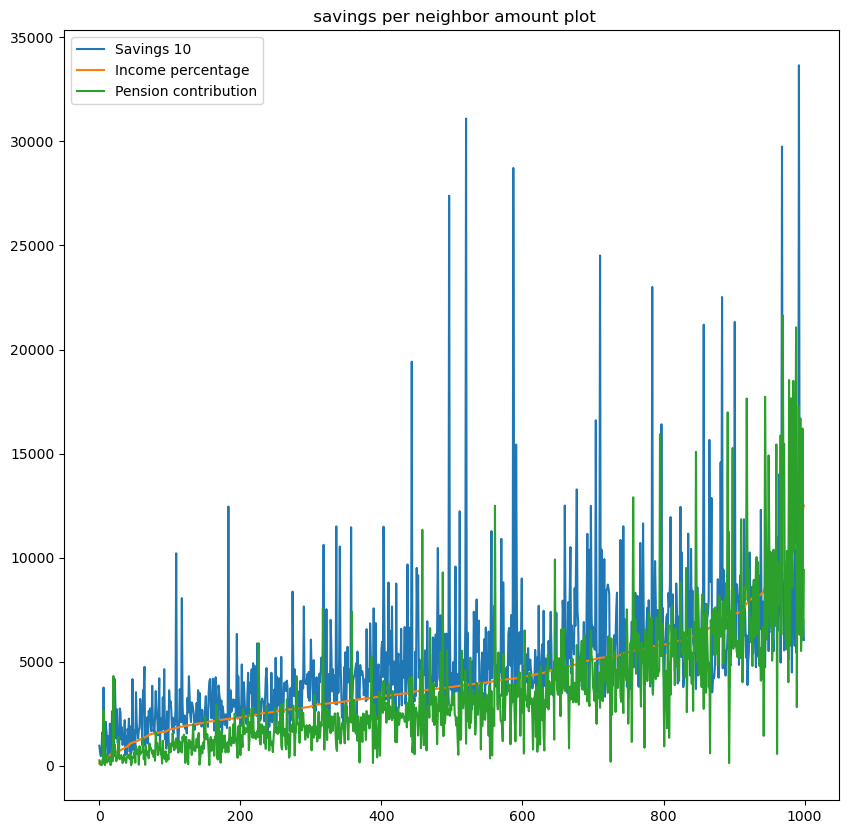

In [190]:
df_datar.head(1000).plot(y=['Savings 10', 'Income percentage', 'Pension contribution'], kind='line', figsize=(10,10), title= " savings per neighbor amount plot")

<Axes: title={'center': ' savings per neighbor amount plot'}>

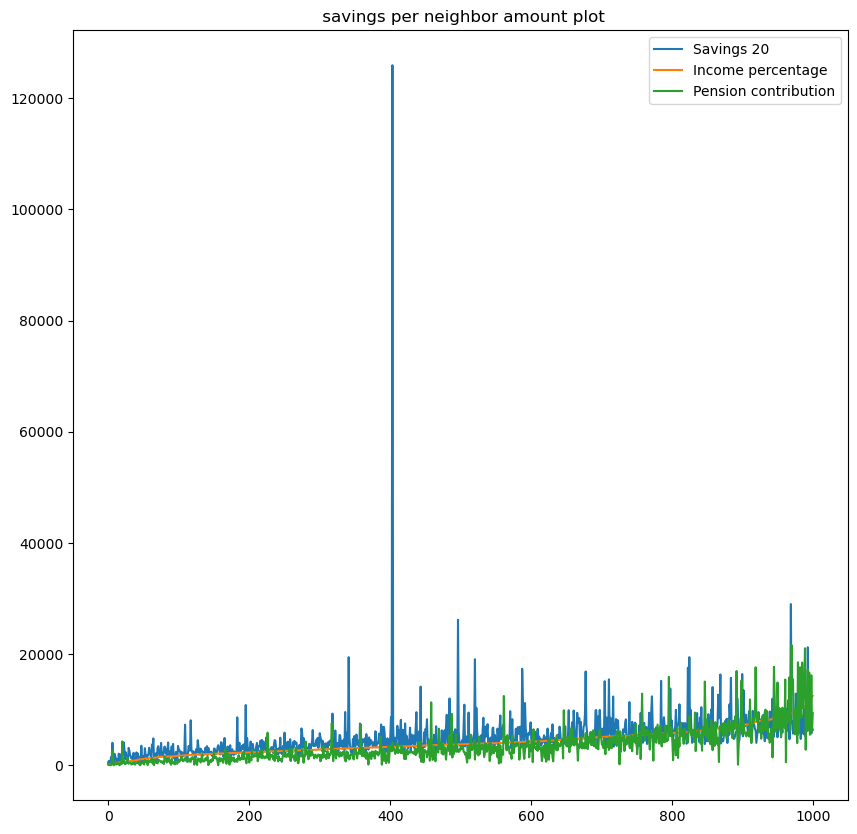

In [191]:
df_datar.head(1000).plot(y=['Savings 20', 'Income percentage', 'Pension contribution'], kind='line', figsize=(10,10), title= " savings per neighbor amount plot")

<Axes: title={'center': ' savings per neighbor amount plot'}>

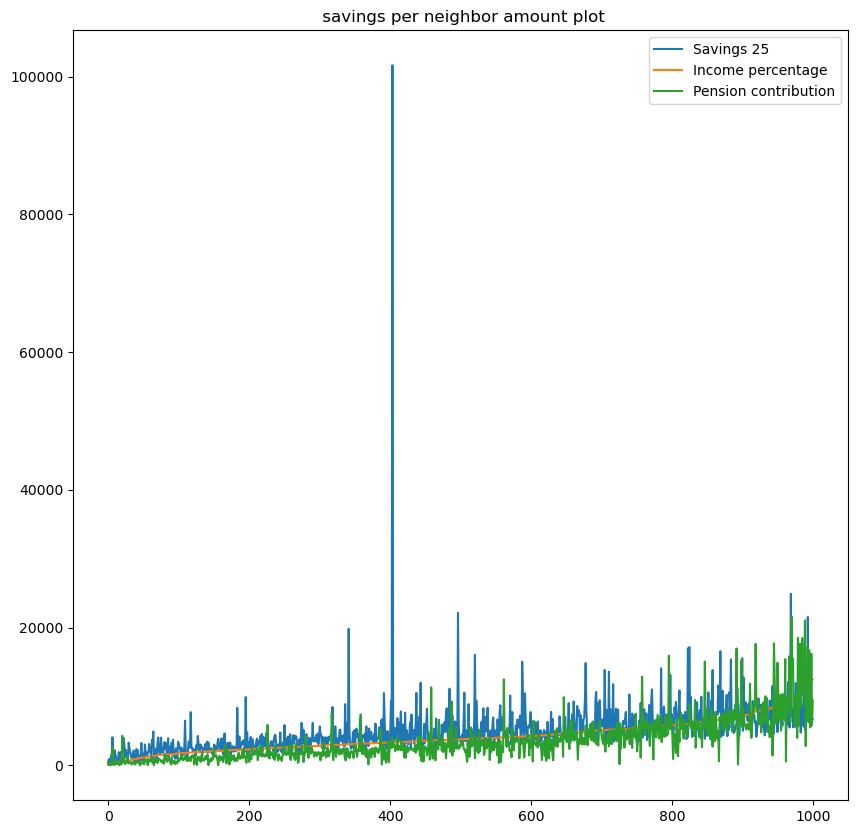

In [192]:
df_datar.head(1000).plot(y=['Savings 25', 'Income percentage', 'Pension contribution'], kind='line', figsize=(10,10), title= " savings per neighbor amount plot")

<Axes: title={'center': ' savings per neighbor amount plot'}>

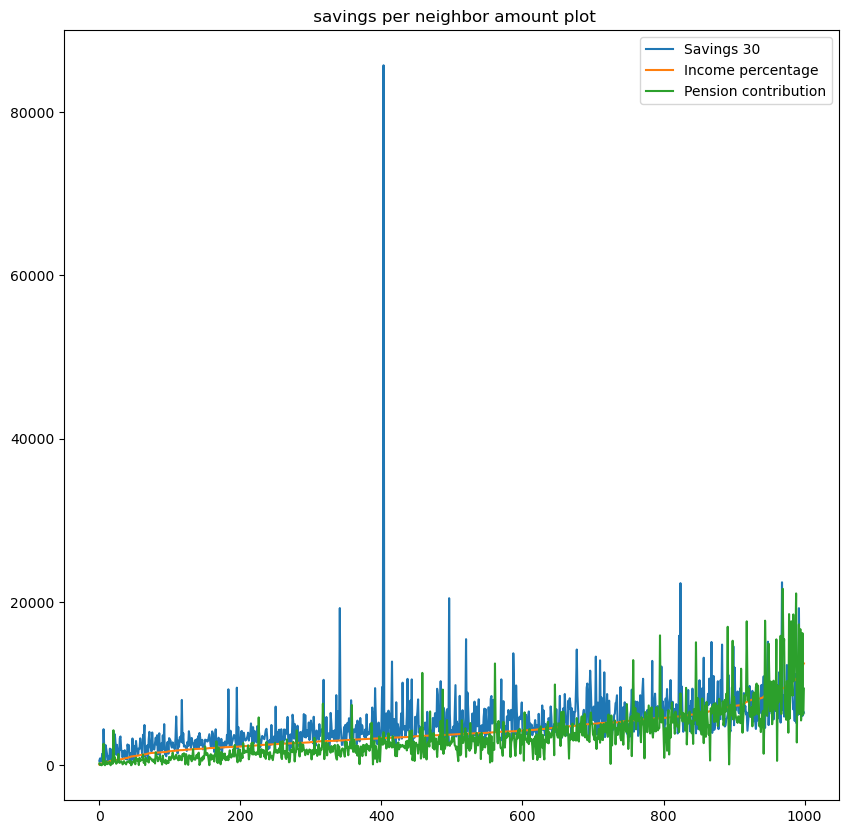

In [75]:
df_datar.head(1000).plot(y=['Savings 30', 'Income percentage', 'Pension contribution'], kind='line', figsize=(10,10), title= " savings per neighbor amount plot")

<Axes: title={'center': ' savings per neighbor amount plot'}>

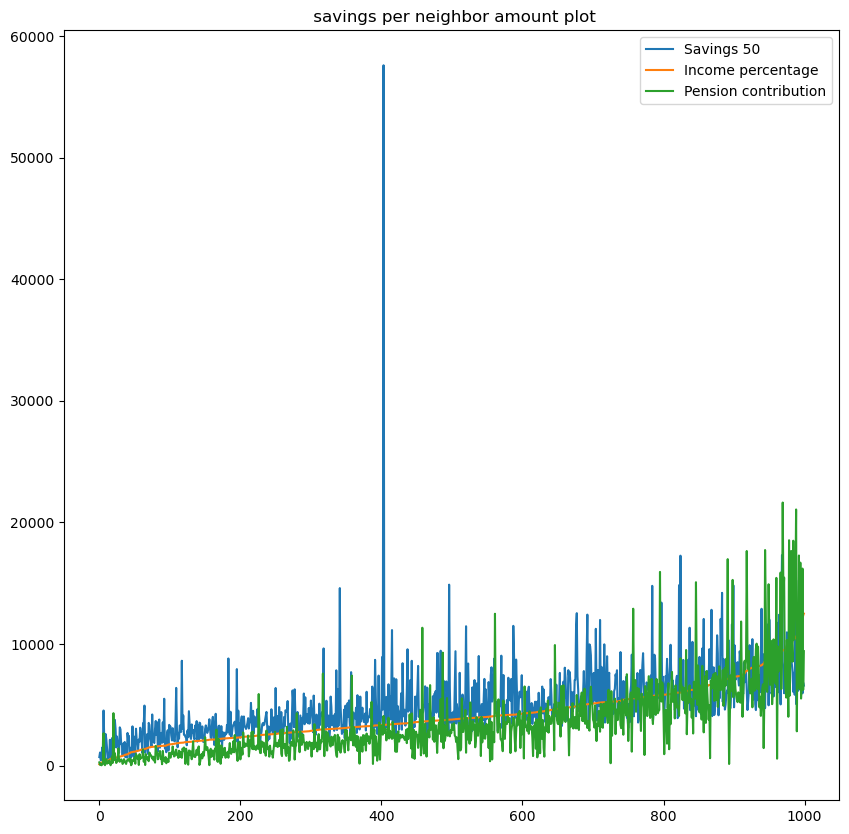

In [76]:
df_datar.head(1000).plot(y=['Savings 50', 'Income percentage', 'Pension contribution'], kind='line', figsize=(10,10), title= " savings per neighbor amount plot")

<Axes: title={'center': ' savings per neighbor amount plot'}>

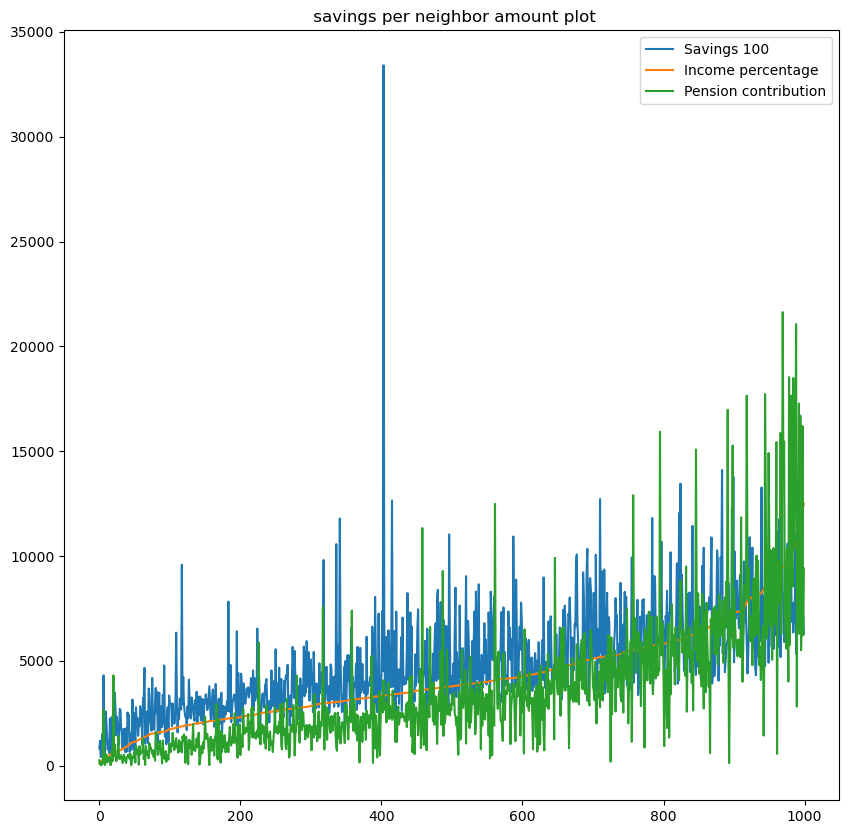

In [77]:
df_datar.head(1000).plot(y=['Savings 100', 'Income percentage', 'Pension contribution'], kind='line', figsize=(10,10), title= " savings per neighbor amount plot")

<Axes: title={'center': ' savings per neighbor amount plot'}>

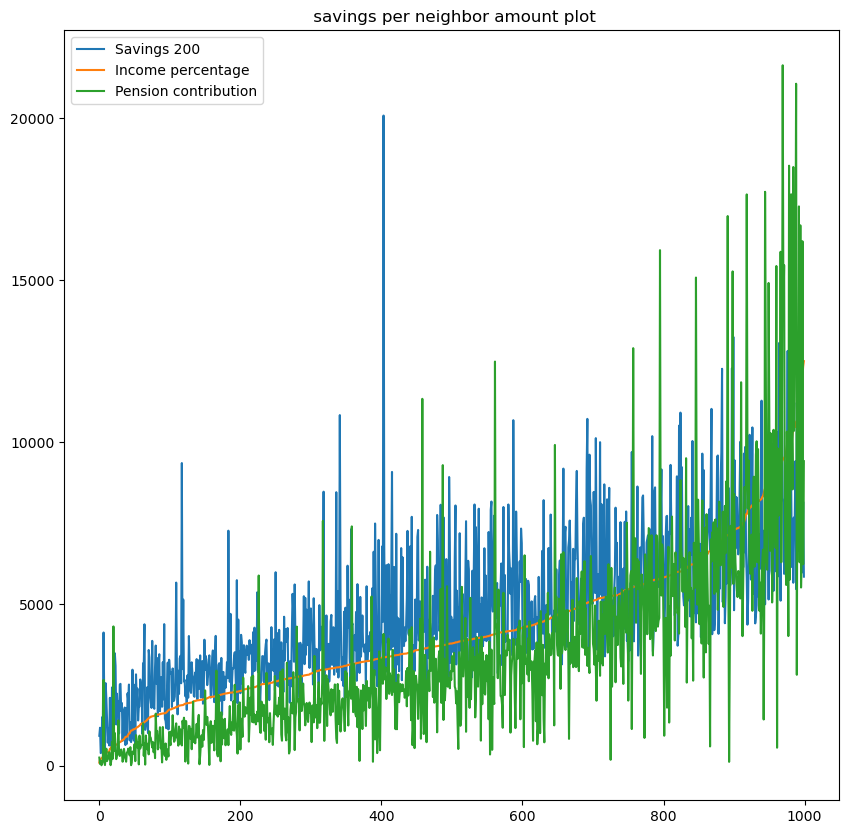

In [78]:
df_datar.head(1000).plot(y=['Savings 200', 'Income percentage', 'Pension contribution'], kind='line', figsize=(10,10), title= " savings per neighbor amount plot")

<Axes: title={'center': ' savings per neighbor amount plot'}>

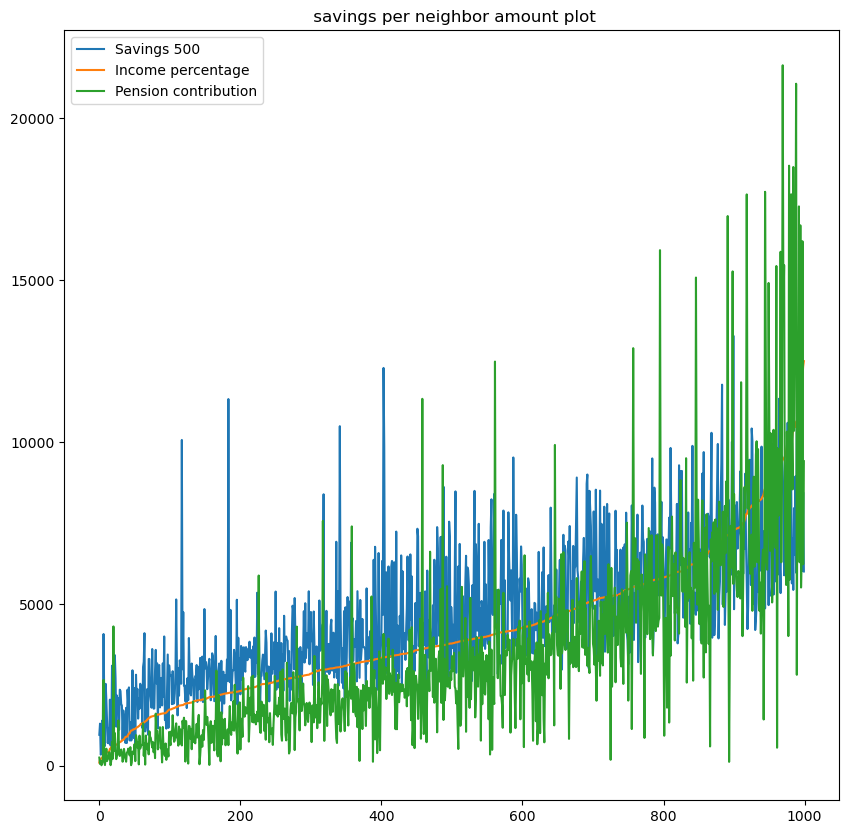

In [79]:
df_datar.head(1000).plot(y=['Savings 500', 'Income percentage', 'Pension contribution'], kind='line', figsize=(10,10), title= " savings per neighbor amount plot")

In [78]:
data = {
    'Index' : idxx,
    'Income percentage' : income_percent,
    'Pension contribution' : pension_contribution,
    'Recommended saving' : savings,
    'Employment' : employment_status
}

In [79]:
df_data = pd.DataFrame(data)

In [80]:
df_data.tail(30)

Index  Income percentage  Pension contribution  Recommended saving  \
10005404    996             3338.1                2536.8            4127.906   
9404130     997             2764.3                1694.7            2407.138   
8931247     998             2236.9                 637.7            2800.244   
6377885     999             1211.9                 732.5            1197.606   
13564574   1000             6651.1                6995.3            8254.874   
2135921    1001            12498.7                9410.1            6711.426   
6687895    1002             3468.5                2932.5            3970.208   
5640690    1003             3878.7                3929.0            4045.928   
1075941    1004             3495.7                4207.3            4855.592   
5034241    1005             3093.0                2140.6            2852.096   
17393808   1006             1699.5                 509.4            2883.278   
7517536    1007             1057.3                 578.8            1545.478   
14774762   1008             1623.4                 307.4            1348.736   
7151512    1009             6814.3                7336.5            8362.152   
6563984    1010             3680.4                3971.5            4022.616   
5857136    1011             2990.4                2670.7            3560.234   
9261607    1012              663.5                 317.6            2459.530   
14978845   1013             4580.0                4103.8            3972.278   
7775623    1014             6339.9                4978.8            7737.800   
3887524    1015             4569.5                3417.0            7119.850   
9656125    1016             3822.4                1320.6            4890.872   
16187042   1017             4194.5                2716.4           10474.182   
6810818    1018             4019.4                3838.9            5614.568   
11663118   1019            26901.3                7351.1           29629.000   
13372147   1020             6363.5                6576.7            5228.652   
14213451   1021            13689.9               18078.1            9736.802   
6703634    1022             7942.2                6266.5            9733.544   
14673834   1023             8320.5                6676.8            8377.484   
7502861    1024             4069.3                1913.2            7191.470   
13910935   1025             5436.4                4115.2            7338.598   

                         Employment  
10005404                   Employee  
9404130                    Employee  
8931247                    Employee  
6377885                    Employee  
13564574                   Employee  
2135921                    Employee  
6687895                    Employee  
5640690                    Employee  
1075941                    Employee  
5034241                    Employee  
17393808                   Employee  
7517536         Student with income  
14774762                   Employee  
7151512                    Employee  
6563984                    Employee  
5857136                    Employee  
9261607                    Employee  
14978845                   Employee  
7775623                    Employee  
3887524                    Employee  
9656125                    Employee  
16187042                   Employee  
6810818                    Employee  
11663118                   Employee  
13372147  Director-majorshareholder  
14213451                   Employee  
6703634                    Employee  
14673834                   Employee  
7502861                    Employee  
13910935                   Employee

In [81]:
grp = df_data.groupby("Employment", group_keys=True)# .apply(lambda x: x)

In [82]:
grp.groups.keys()

dict_keys(['Co-working family member', 'Director-majorshareholder', 'Employee', 'Receiver incapacitated benefit', 'Receiver pension benefit', 'Receiver social assistance benefit', 'Receiver social benefit other', 'Receiver unemployment benefit', 'Self-employed', 'Self-employed other', 'Student with income', 'Student without income', 'Without income other'])

In [83]:
list(range(len(grp.get_group('Receiver social assistance benefit'))))

[0, 1]

/tmp/ipykernel_30902/3505979966.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["Index"] = list(range(len(dff)))
/tmp/ipykernel_30902/3505979966.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["Index"] = list(range(len(dff)))
/tmp/ipykernel_30902/3505979966.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

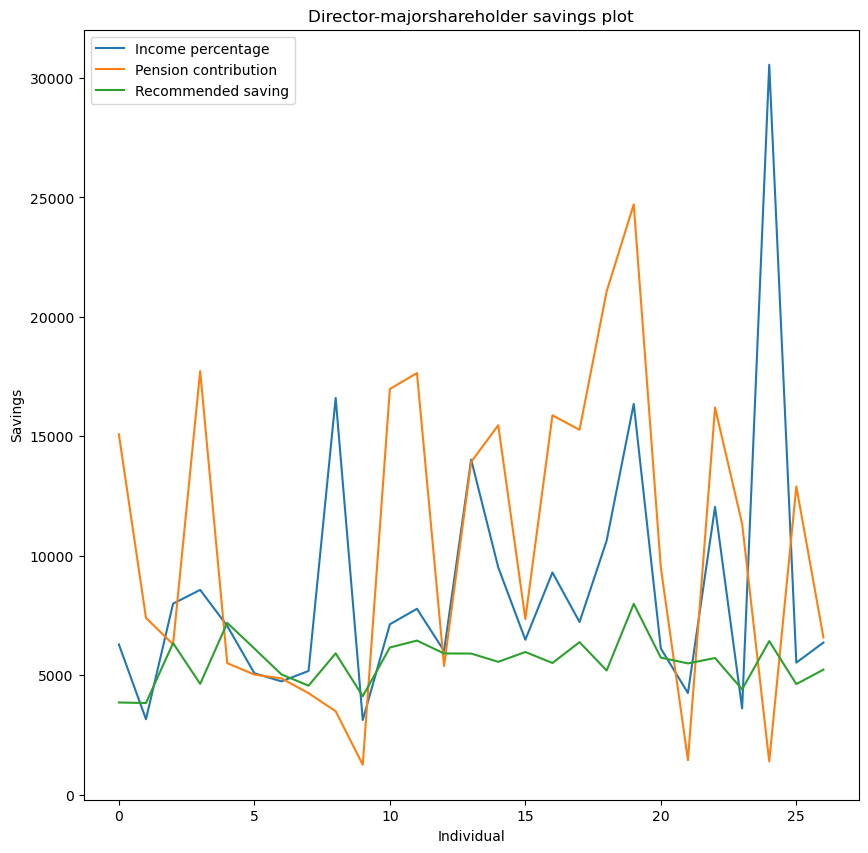

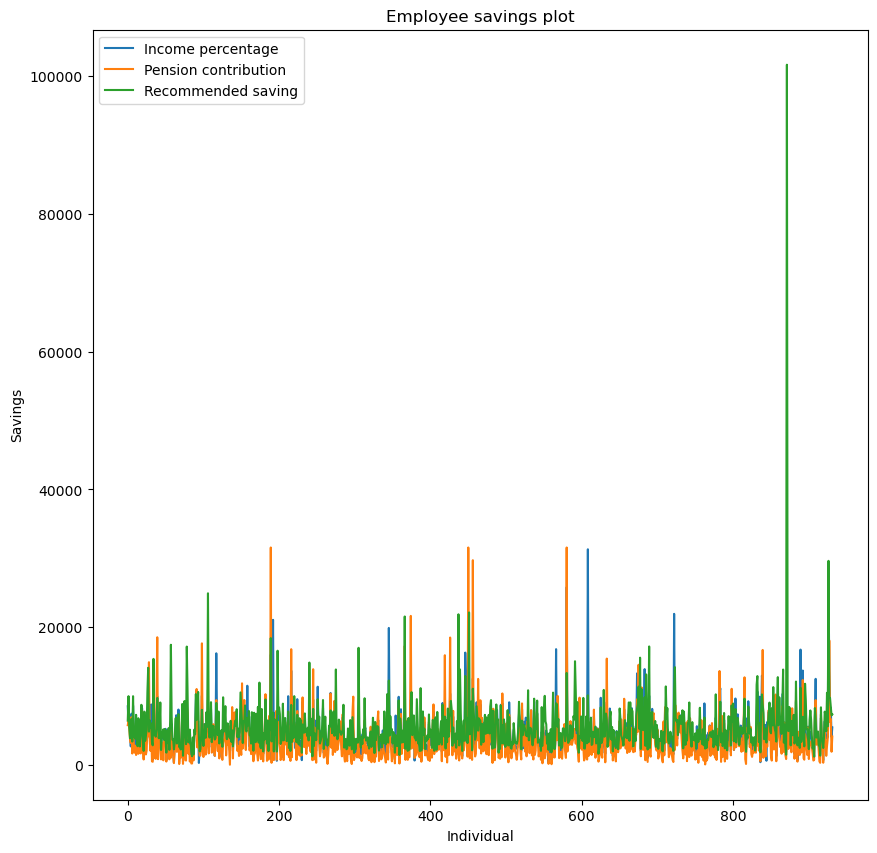

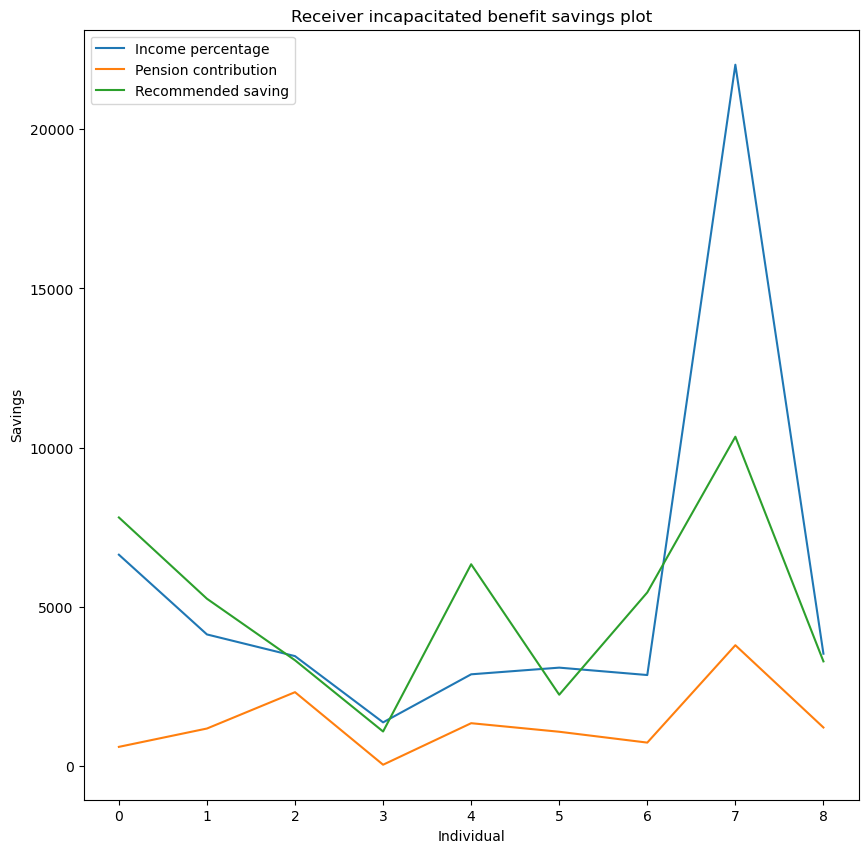

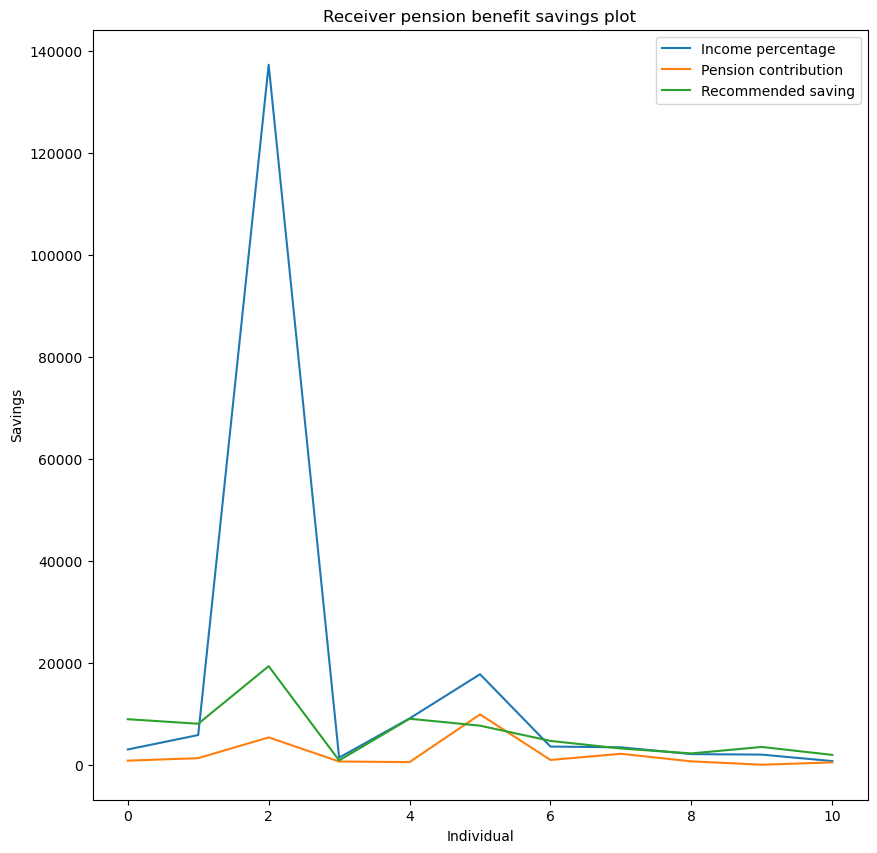

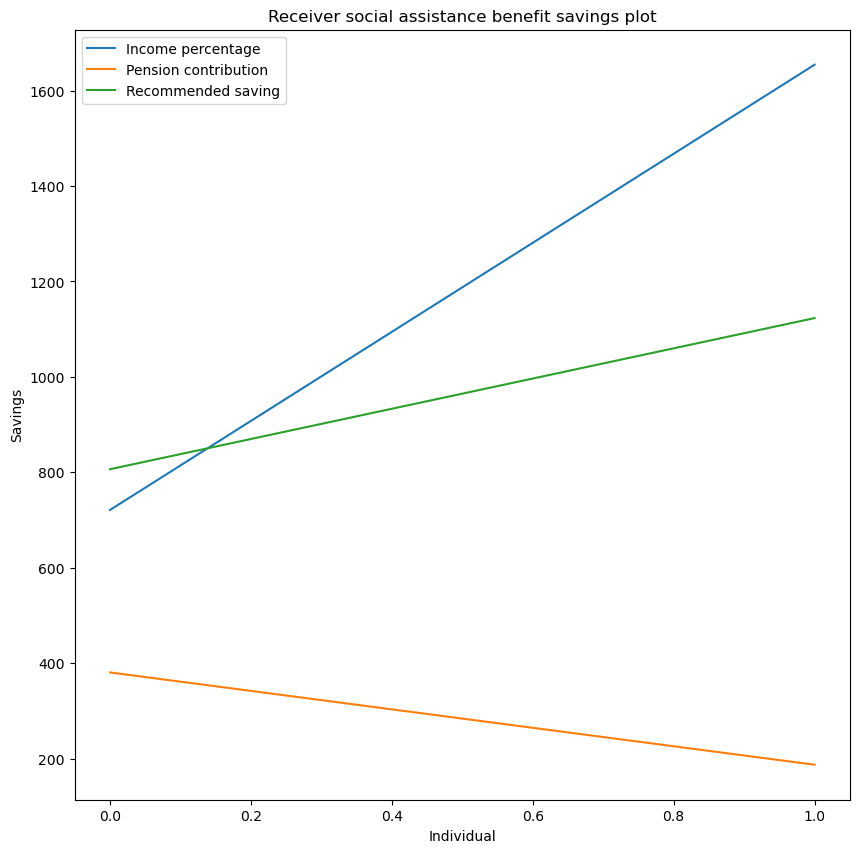

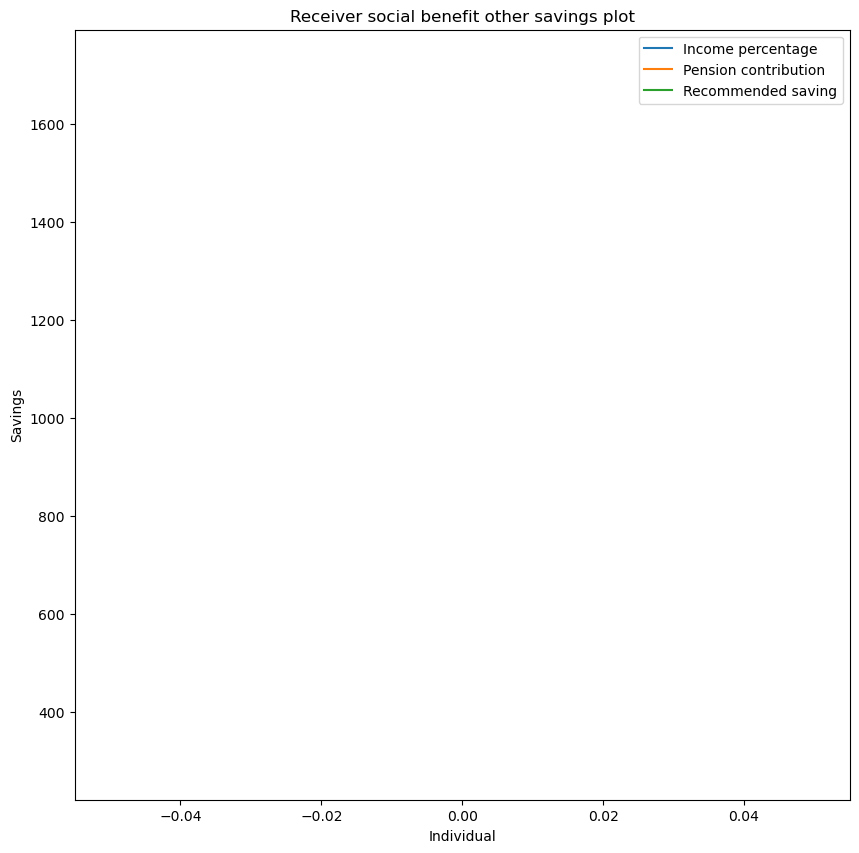

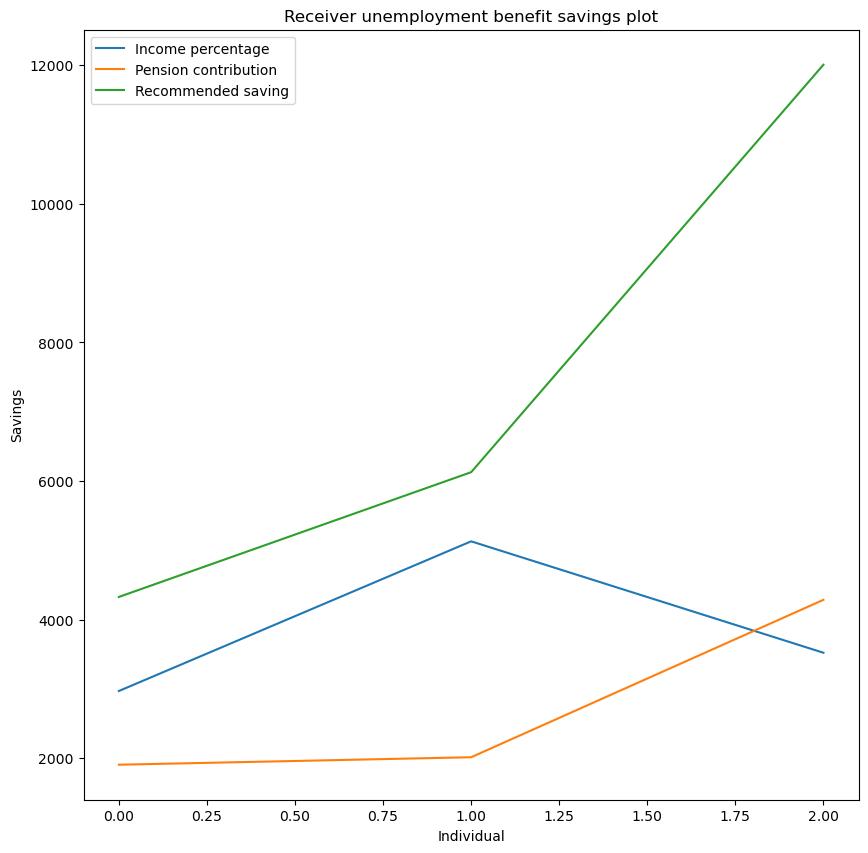

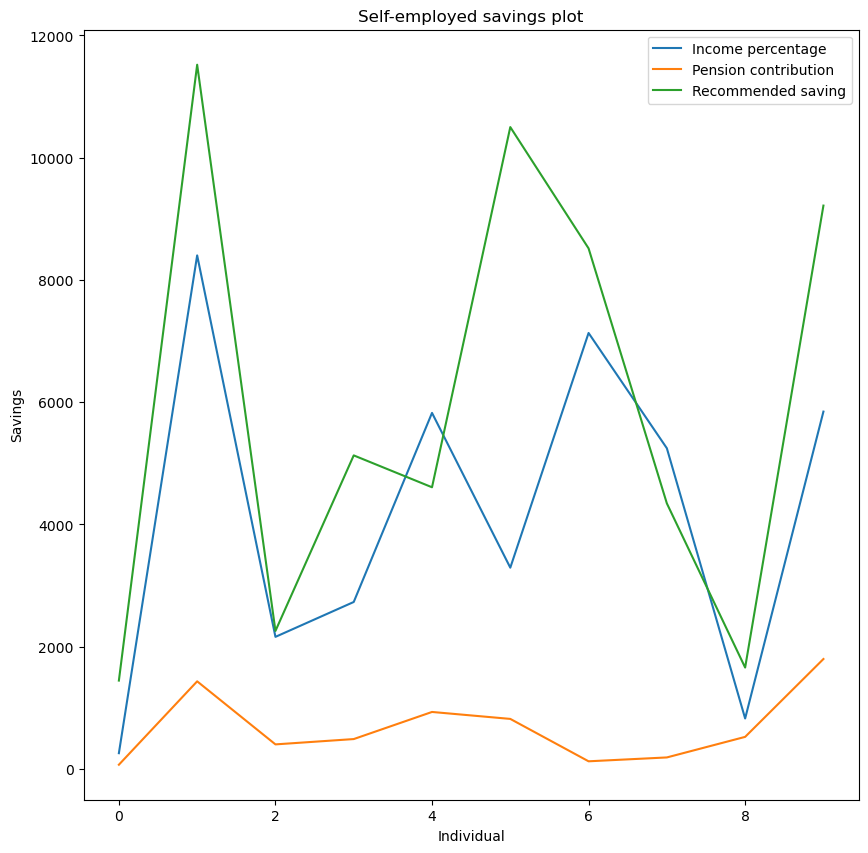

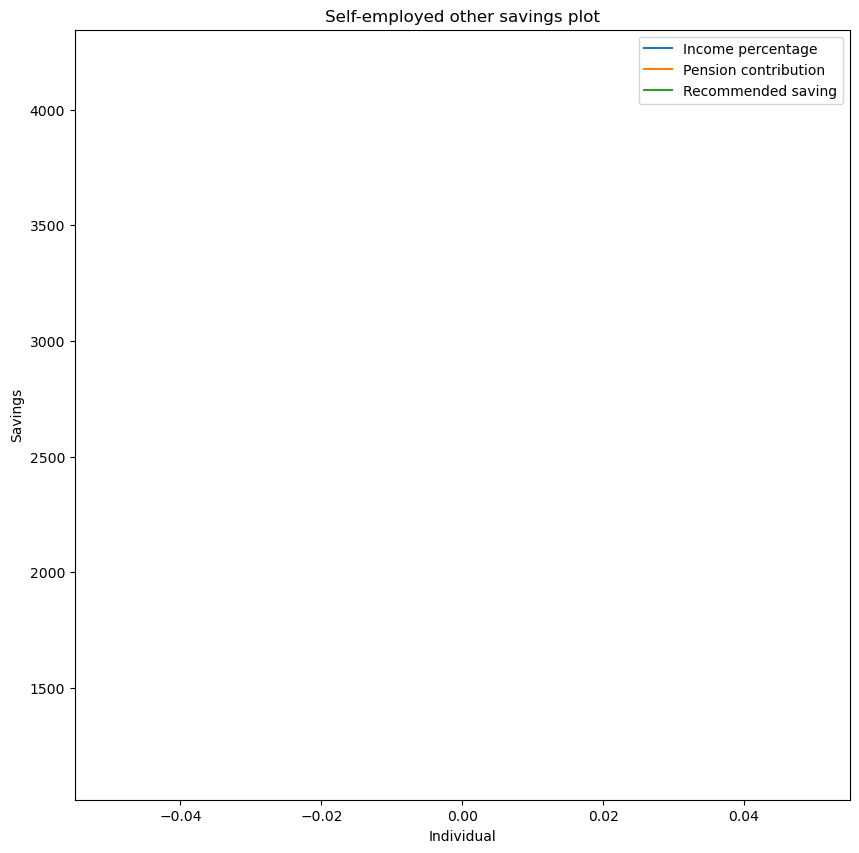

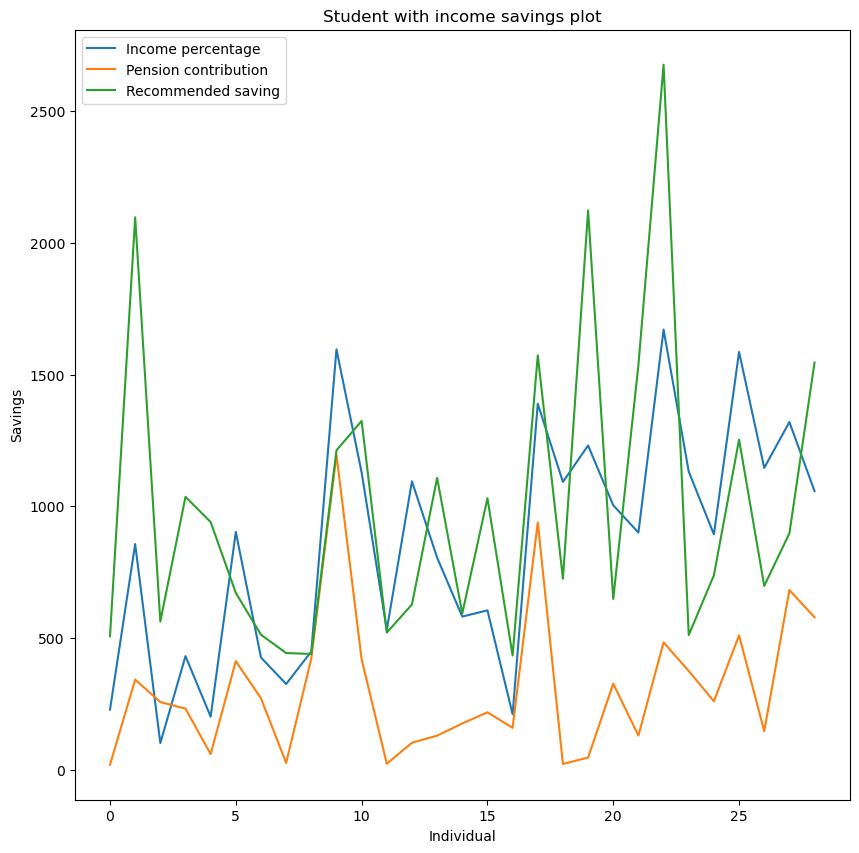

In [84]:
for agrp in grp.groups.keys():
    if agrp=='Student without income' or agrp=='Without income other' or agrp=='Co-working family member': continue
    dff = grp.get_group(agrp)
    dff["Index"] = list(range(len(dff)))
    dff.plot(x="Index", y=['Income percentage', 'Pension contribution', 'Recommended saving'], kind='line', figsize=(10,10), title=agrp+" savings plot", xlabel="Individual", ylabel="Savings")

<Axes: xlabel='Index'>

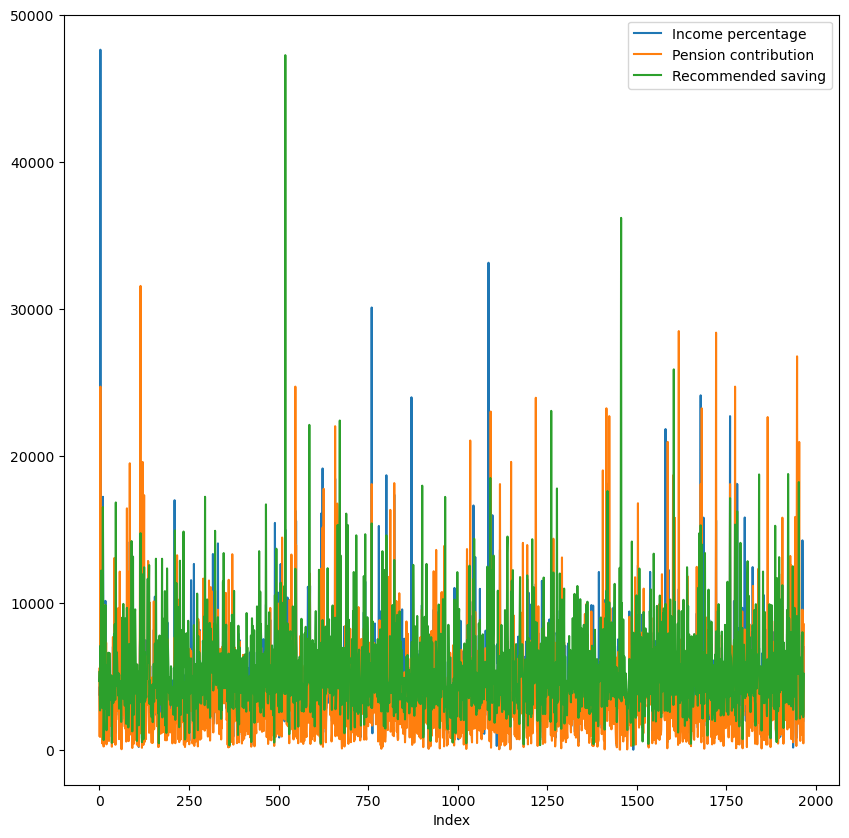

In [88]:
df_data.plot(x="Index", y=['Income percentage', 'Pension contribution', 'Recommended saving'], kind='line', figsize=(10,10))

<Axes: xlabel='Index'>

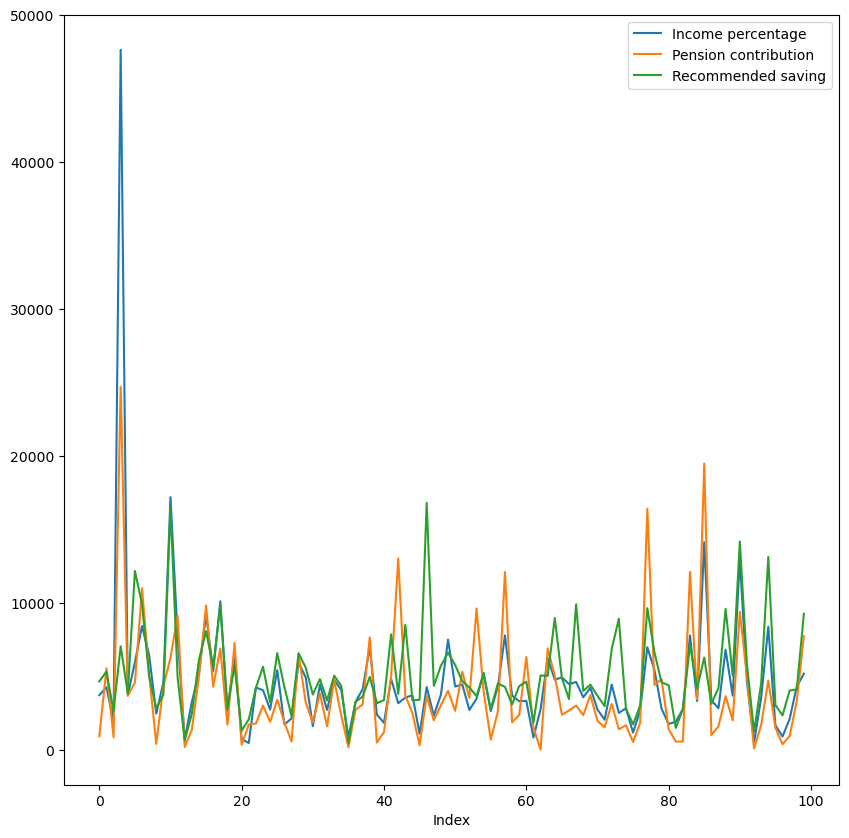

In [89]:
df_data[:100].plot(x="Index", y=['Income percentage', 'Pension contribution', 'Recommended saving'], kind='line', figsize=(10,10))

## Deep Neural networks Pipeline

In [126]:
del df_pan

NameError: name 'df_pan' is not defined

In [130]:
del cate

In [132]:
gc.collect()

0

In [80]:
import tensorflow as tf
import tensorflow_similarity as tfsim
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

Your CPU supports instructions that this binary was not compiled to use: SSE3 SSE4.1 SSE4.2 AVX AVX2
For maximum performance, you can install NMSLIB from sources 
pip install --no-binary :all: nmslib


In [81]:
from tensorflow_similarity.layers import MetricEmbedding
from tensorflow.keras import layers
from tensorflow.keras.layers import Normalization, IntegerLookup, StringLookup
from tensorflow_similarity.models import SimilarityModel

In [82]:
tfsim.utils.tf_cap_memory()

In [83]:
batchsize=500

In [84]:
colQuantiles.columns

Index(['SBI2008VJJJJ', 'SBISELFEMPLOYED', 'SBI2008VPBL38', 'INPPN700PEN',
       'INPPG710PEN', 'INPPH770OUP', 'INPPH570ZWP', 'INPPERSPRIM',
       'INPPERSINK', 'INPPERSBRUT', 'INPT2070WIN', 'INPT1060OVE',
       'INPT1040NAT', 'INPT1030DGN', 'INPT1020AMB', 'INPT1000WER',
       'INPPG610WAO', 'INPPG410WW', 'AANTALPERSHH', 'VEHWVEREXEWH',
       'VEHW1000VERH', 'VEHW1100BEZH', 'VEHW1110FINH', 'VEHW1111BANH',
       'VEHW1112EFFH', 'VEHW1120ONRH', 'VEHW1121WONH', 'VEHW1122OGOH',
       'VEHW1130ONDH', 'VEHW1140ABEH', 'VEHW1150OVEH', 'VEHW1200STOH',
       'VEHW1210SHYH', 'VEHW1220SSTH', 'VEHW1230SOVH', 'INHGESTINKH',
       'INHPRIMINKH', 'SMODELRAMINGPENSIOENPREMIEWG',
       'SMODELRAMINGPENSIOENPREMIEWN', 'INPSBI2008V', 'AMREGIO', 'COROP',
       'GEM2020'],
      dtype='object')

In [91]:
cate.head()

GBABURGSTNWKLASSE4                    INPSECJ  \
6977945   Married including partnership              Self-employed   
10804622  Married including partnership                   Employee   
8204856   Married including partnership   Receiver pension benefit   
3323315   Married including partnership  Director-majorshareholder   
2686360                     Not married                   Employee   

                       INPPINK INPT1068ZVW                         TYPHH  \
6977945   With personal income         0.0         Married with children   
10804622  With personal income         0.0         Married with children   
8204856   With personal income         0.0      Married without children   
3323315   With personal income         0.0         Married with children   
2686360   With personal income         0.0  Non-married without children   

                                                    PLHH  \
6977945          Partner in married couple with children   
10804622         Partner in married couple with children   
8204856       Partner in married couple without children   
3323315          Partner in married couple with children   
2686360   Partner in non-married couple without children   

                                                         INHSAMHH  \
6977945                           Couple with only minor children   
10804622                          Couple with only minor children   
8204856   Couple without children, main breadwinner above AOW-age   
3323315                           Couple with only minor children   
2686360   Couple without children, main breadwinner below AOW-age   

         MAINBREADWINNER AANTALKINDHH  INHEHALGR  \
6977945                0          2.0  Own house   
10804622               1          2.0  Own house   
8204856                0          0.0  Own house   
3323315                1          2.0  Own house   
2686360                0          0.0  Own house   

                              INPPOSHHK HOMEOWNER                INHBBIHJ  \
6977945                 Married partner         1                  Salary   
10804622  Main breadwinner with partner         1                  Salary   
8204856                 Married partner         1        Pension benefits   
3323315   Main breadwinner with partner         1              Salary DGA   
2686360             Non-married partner         1  Profit self-employment   

                                                    INHPOPIIV  \
6977945   Private household with observed income; no students   
10804622  Private household with observed income; no students   
8204856   Private household with observed income; no students   
3323315   Private household with observed income; no students   
2686360   Private household with observed income; no students   

         OPLNIVSOI2016AGG1HB SMODELRAMINGPF INPPN400WW PROVINCIE STEDGEM G4  \
6977945               Middle                       0.0        27       5  0   
10804622                High            026        0.0        30       3  0   
8204856               Middle                       0.0        27       1  1   
3323315               Middle            203        0.0        26       1  1   
2686360                 High            024        0.0        30       4  0   

         LANDSDEEL         STEDBUURT  
6977945          3      Little urban  
10804622         4  Reasonably urban  
8204856          3        Very urban  
3323315          3        Very urban  
2686360          4         Not urban

#### categorical features with string values --> first turn string into ineteger indices and then one hot encode

#### Other categorical feature with numbers we just one hot encode

#### Numeric feature we z-score normalize

In [85]:
str_cat_features = ['GBABURGSTNWKLASSE4', 'INPSECJ', 'INPPINK', 'TYPHH',
       'PLHH', 'INHSAMHH', 'INHEHALGR', 'CTO2016V', 'SMODELRAMINGPF',
       'INPPOSHHK', 'INHBBIHJ', 'INHPOPIIV',
       'OPLNIVSOI2016AGG1HB', 'STEDBUURT']

In [86]:
num_cat_features = ['INPT1068ZVW', 'MAINBREADWINNER', 'AANTALKINDHH', 'HOMEOWNER', 'INPPN400WW',
       'SBI2008VJJJJ', 'SBISELFEMPLOYED', 'SBI2008VPBL38', 'PROVINCIE', 'STEDGEM', 'G4',
       'LANDSDEEL']

In [87]:
for col in str_cat_features+num_cat_features:
    if col == 'MAINBREADWINNER' or col == 'HOMEOWNER': key = col+'2019'
    elif col == 'RINPERSOON' or col == 'risk_prefrence' : continue
    else: key = col+'2020'
    val = len(df_samp_bac[col].unique())
    print(f"{col} --> {dictionary[key]} : {val}")

GBABURGSTNWKLASSE4 --> Marital Status 4 Categories : 4
INPSECJ --> Occupation (Social-Economic Category) : 13
INPPINK --> Income IND Personal Y/N : 2
TYPHH --> HH Type : 8
PLHH --> HH Position of Individual : 10
INHSAMHH --> HH Composition : 21
INHEHALGR --> HH Home Ownership : 4
CTO2016V --> Education Type Classification : 142
SMODELRAMINGPF --> Pension Fund : 89
INPPOSHHK --> HH Position Towards Main Breadwinner : 7
INHBBIHJ --> HH Main Income Source : 11
INHPOPIIV --> HH Income Type : 3
OPLNIVSOI2016AGG1HB --> Education Level 3 Categories : 4
STEDBUURT --> Location Urbanity Neighbourhood : 6
INPT1068ZVW --> Contribution Reimbursment Health Insurance by Employer : 1
MAINBREADWINNER --> Main Breadwinner : 2
AANTALKINDHH --> HH Amount of Children : 17
HOMEOWNER --> Homeowner if Breadwinner or Partner : 2
INPPN400WW --> premie ww ten laste van werknemer : 1
SBI2008VJJJJ --> Sector (SBI) Employee : 937
SBISELFEMPLOYED --> Sector (SBI) Self-Employed : 956
SBI2008VPBL38 --> Sector (SBI) Em

In [95]:
list(df_samp_bac['INHBBIHJ'].unique())

['Salary',
 'Pension benefits',
 'Salary DGA',
 'Profit self-employment',
 'Incapacitation benefits',
 'Social assistance benefits',
 'Unemployment benefits',
 'Social benefits other',
 'Income other self-employment',
 'Study grant',
 'Income from wealth']

In [96]:
list(df_samp_bac['INPSECJ'].unique())

['Self-employed',
 'Employee',
 'Receiver pension benefit',
 'Director-majorshareholder',
 'Student without income',
 'Receiver social assistance benefit',
 'Student with income',
 'Receiver unemployment benefit',
 'Receiver incapacitated benefit',
 'Without income other',
 'Self-employed other',
 'Co-working family member',
 'Receiver social benefit other']

In [97]:
df_samp_bac['INHBBIHJ'].value_counts()

Salary                          5364519
Pension benefits                1765788
Profit self-employment           721338
Social assistance benefits       305575
Salary DGA                       271244
Incapacitation benefits          264317
Social benefits other            145178
Income from wealth                60478
Unemployment benefits             49718
Study grant                       30488
Income other self-employment      21357
Name: INHBBIHJ, dtype: int64

In [88]:
num_features = ['INPPN700PEN', 'INPPG710PEN', 'INPPH770OUP', 'INPPH570ZWP',
       'INPPERSPRIM', 'INPPERSINK', 'INPPERSBRUT', 'INPT2070WIN',
       'INPT1060OVE', 'INPT1040NAT', 'INPT1030DGN', 'INPT1020AMB',
       'INPT1000WER', 'INPPG610WAO', 'INPPG410WW', 'AANTALPERSHH',
       'VEHWVEREXEWH', 'VEHW1000VERH', 'VEHW1100BEZH', 'VEHW1110FINH',
       'VEHW1111BANH', 'VEHW1112EFFH', 'VEHW1120ONRH', 'VEHW1121WONH',
       'VEHW1122OGOH', 'VEHW1130ONDH', 'VEHW1140ABEH', 'VEHW1150OVEH',
       'VEHW1200STOH', 'VEHW1210SHYH', 'VEHW1220SSTH', 'VEHW1230SOVH',
       'INHGESTINKH', 'INHPRIMINKH', 'SMODELRAMINGPENSIOENPREMIEWG',
       'SMODELRAMINGPENSIOENPREMIEWN', 'INPSBI2008V', 'AMREGIO', 'COROP',
       'GEM2020', 'risk_prefrence']

In [89]:
def encod_num_features(name, ds):
    feat = keras.Input(shape=(1,), name=name)
    normalizer = Normalization()
    feat_ds =  ds.map(lambda x: x[name])
    #feat_ds = feat_ds.map(lambda x: tf.expand_dims[x, -1])
    normalizer.adapt(feat_ds)
    encoded_feature = normalizer(feat)
    return encoded_feature

In [90]:
def encod_cat_features(name, ds, is_string):
    if is_string:
        lookup_class = StringLookup
        feat = keras.Input(shape=(1,), name=name, dtype="string")
    else:
        lookup_class = IntegerLookup
        feat = keras.Input(shape=(1,), name=name, dtype="int64")
    lookup = lookup_class(output_mode="binary")
    feat_ds =  ds.map(lambda x: x[name])
    #print(feat_ds)
    #feat_ds = feat_ds.map(lambda x: tf.expand_dims[x, -1])
    lookup.adapt(feat_ds)
    encoded_feature = lookup(feat)
    return encoded_feature

In [ ]:
all_features = []
for f in str_cat_features:
    all_features.append(encod_cat_features(f, ds, True))
for f in num_cat_features:
    all_features.append(encod_cat_features(f, ds, False))
for f in num_features:
    all_features.append(encod_num_features(f, ds))

In [ ]:
del tesset
del tes

In [91]:
LE = LabelEncoder()
y_train = LE.fit_transform(df_samp_bac['INHBBIHJ'])

In [92]:
tesset = df_samp_bac.drop(['RINPERSOON', 'INHBBIHJ', 'risk_prefrence'], axis=1)

In [93]:
encoders = {}
for col in str_cat_features+num_cat_features:
    if not col=="INHBBIHJ":
        LES = LabelEncoder()
        tesset[col] = LES.fit_transform(tesset[col])
        key = str("le_"+str(col))
        encoders[key] = LES

In [94]:
tesset.fillna(0, inplace=True)

In [95]:
tes = tesset.to_numpy()

In [96]:
CLASSES = list(set(y_train))
NUM_CLASSES = len(CLASSES)
CLASSES_PER_BATCH = NUM_CLASSES
EXAMPLES_PER_CLASS = 10
STEPS_PER_EPOCH = 1000

sampler = tfsim.samplers.MultiShotMemorySampler(
        tes,
        y_train,
        classes_per_batch=CLASSES_PER_BATCH,
        examples_per_class_per_batch=EXAMPLES_PER_CLASS,
        class_list=CLASSES,
        steps_per_epoch=STEPS_PER_EPOCH
)


The initial batch size is 110 (11 classes * 10 examples per class) with 0 augmentations


filtering examples:   0%|          | 0/9000000 [00:00<?, ?it/s]

selecting classes:   0%|          | 0/11 [00:00<?, ?it/s]

gather examples:   0%|          | 0/9000000 [00:00<?, ?it/s]

indexing classes:   0%|          | 0/9000000 [00:00<?, ?it/s]

#### It would be nice to show that 45 dimensions shows the best result with graph of minimization !!!!!!!!!!!!!!!!

In [97]:
tes.shape

(9000000, 65)

In [98]:
#x = layers.LayerNormalization(epsilon=1e-6)(imput)

In [99]:
hidden_layer_units = [64, 32]
dropout_rate = 0.3

In [100]:
def get_model(embed=20):
    imput = layers.Input(shape = (65,) )
    x = layers.Dense(128)(imput)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(dropout_rate)(x)
    
    for num_unit in hidden_layer_units:
        x = layers.Dense(num_unit)(x)
        x = layers.BatchNormalization()(x)
        x = layers.LeakyReLU()(x)
        x = layers.Dropout(dropout_rate)(x)
    
    x = layers.Flatten()(x)
    output = tfsim.layers.MetricEmbedding(embed)(x)
    return tfsim.models.SimilarityModel(imput, output)

In [101]:
model = get_model()
model.summary()

Model: "similarity_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 65)]              0         
                                                                 
 dense (Dense)               (None, 128)               8448      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                  

In [102]:
model2 = get_model(30)
model2.summary()

Model: "similarity_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 65)]              0         
                                                                 
 dense_3 (Dense)             (None, 128)               8448      
                                                                 
 batch_normalization_3 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 128)               0         
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                

In [103]:
model3 = get_model(35)
model3.summary()

Model: "similarity_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 65)]              0         
                                                                 
 dense_6 (Dense)             (None, 128)               8448      
                                                                 
 batch_normalization_6 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 128)               0         
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                

In [104]:
model4 = get_model(40)
model4.summary()

Model: "similarity_model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 65)]              0         
                                                                 
 dense_9 (Dense)             (None, 128)               8448      
                                                                 
 batch_normalization_9 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 128)               0         
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                

In [105]:
model5 = get_model(45)
model5.summary()

Model: "similarity_model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 65)]              0         
                                                                 
 dense_12 (Dense)            (None, 128)               8448      
                                                                 
 batch_normalization_12 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 128)               0         
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                

In [106]:
model6 = get_model(50)
model6.summary()

Model: "similarity_model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 65)]              0         
                                                                 
 dense_15 (Dense)            (None, 128)               8448      
                                                                 
 batch_normalization_15 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 128)               0         
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                

In [107]:
model7 = get_model(60)
model7.summary()

Model: "similarity_model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 65)]              0         
                                                                 
 dense_18 (Dense)            (None, 128)               8448      
                                                                 
 batch_normalization_18 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 128)               0         
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                

In [108]:
distance = "cosine"
loss = tfsim.losses.MultiSimilarityLoss(distance=distance)

In [109]:
LR = 0.000005
model.compile(optimizer=tf.keras.optimizers.Adam(LR), loss=loss)

Distance metric automatically set to cosine use the distance arg to override.


In [110]:
LR = 0.000005
model2.compile(optimizer=tf.keras.optimizers.Adam(LR), loss=loss)

Distance metric automatically set to cosine use the distance arg to override.


In [111]:
LR = 0.000005
model3.compile(optimizer=tf.keras.optimizers.Adam(LR), loss=loss)

Distance metric automatically set to cosine use the distance arg to override.


In [112]:
model4.compile(optimizer=tf.keras.optimizers.Adam(LR), loss=loss)

Distance metric automatically set to cosine use the distance arg to override.


In [113]:
model5.compile(optimizer=tf.keras.optimizers.Adam(LR), loss=loss)
model6.compile(optimizer=tf.keras.optimizers.Adam(LR), loss=loss)

Distance metric automatically set to cosine use the distance arg to override.
Distance metric automatically set to cosine use the distance arg to override.


In [114]:
model7.compile(optimizer=tf.keras.optimizers.Adam(LR), loss=loss)

Distance metric automatically set to cosine use the distance arg to override.


In [115]:
EPOCHS = 40
history = model.fit(sampler, epochs=EPOCHS)

Epoch 1/40
1000/1000 [==============================] - 6s 4ms/step - loss: 1.7287
Warmup complete
Epoch 2/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.6602
Epoch 3/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.6156
Epoch 4/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5891
Epoch 5/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5637
Epoch 6/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5443
Epoch 7/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5271
Epoch 8/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5085
Epoch 9/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4934
Epoch 10/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4801
Epoch 11/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4697
Epoch 12/40
1000/1000 [==============================] - 4s 4ms/step 

In [116]:
EPOCHS = 40
history2 = model2.fit(sampler, epochs=EPOCHS)

Epoch 1/40
1000/1000 [==============================] - 7s 5ms/step - loss: 1.6922
Epoch 2/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.6396
Epoch 3/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5991
Epoch 4/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5677
Epoch 5/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5409
Epoch 6/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5186
Epoch 7/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4994
Epoch 8/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4823
Epoch 9/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4680
Epoch 10/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4546
Epoch 11/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4415
Epoch 12/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4301
E

In [117]:
EPOCHS = 40
history3 = model3.fit(sampler, epochs=EPOCHS)

Epoch 1/40
1000/1000 [==============================] - 6s 4ms/step - loss: 1.6999
Epoch 2/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.6541
Epoch 3/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.6173
Epoch 4/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5843
Epoch 5/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5545
Epoch 6/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5329
Epoch 7/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5111
Epoch 8/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4909
Epoch 9/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4755
Epoch 10/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4599
Epoch 11/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4448
Epoch 12/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4331
E

In [118]:
EPOCHS = 40
history4 = model4.fit(sampler, epochs=EPOCHS)

Epoch 1/40
1000/1000 [==============================] - 5s 4ms/step - loss: 1.6730
Epoch 2/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.6326
Epoch 3/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5968
Epoch 4/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5647
Epoch 5/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5394
Epoch 6/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5179
Epoch 7/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4962
Epoch 8/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4776
Epoch 9/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4630
Epoch 10/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4477
Epoch 11/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4345
Epoch 12/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4226
E

In [119]:
history5 = model5.fit(sampler, epochs=EPOCHS)

Epoch 1/40
1000/1000 [==============================] - 5s 4ms/step - loss: 1.6872
Epoch 2/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.6425
Epoch 3/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.6038
Epoch 4/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5735
Epoch 5/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5468
Epoch 6/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5252
Epoch 7/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5017
Epoch 8/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4866
Epoch 9/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4701
Epoch 10/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4551
Epoch 11/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4409
Epoch 12/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4281
E

In [120]:
history6 = model6.fit(sampler, epochs=EPOCHS)

Epoch 1/40
1000/1000 [==============================] - 5s 4ms/step - loss: 1.6861
Epoch 2/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.6488
Epoch 3/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.6129
Epoch 4/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5793
Epoch 5/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5511
Epoch 6/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5233
Epoch 7/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5000
Epoch 8/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4793
Epoch 9/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4610
Epoch 10/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4450
Epoch 11/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4311
Epoch 12/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4196
E

In [121]:
history7 = model7.fit(sampler, epochs=EPOCHS)

Epoch 1/40
1000/1000 [==============================] - 5s 4ms/step - loss: 1.6549
Epoch 2/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.6112
Epoch 3/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5739
Epoch 4/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5437
Epoch 5/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5174
Epoch 6/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4961
Epoch 7/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4769
Epoch 8/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4585
Epoch 9/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4426
Epoch 10/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4294
Epoch 11/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4164
Epoch 12/40
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4047
E

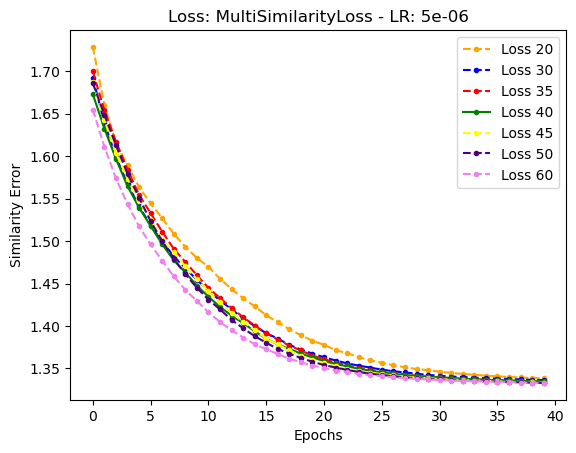

In [122]:
plt.plot(history.history["loss"], label='Loss 20', color='orange', marker='.', linestyle='dashed')
plt.plot(history2.history["loss"], label='Loss 30', color='blue', marker='.', linestyle='dashed')
plt.plot(history3.history["loss"], label='Loss 35', color='red', marker='.', linestyle='dashed')
plt.plot(history4.history["loss"], label='Loss 40', color='green', marker='.')
plt.plot(history5.history["loss"], label='Loss 45', color='yellow', marker='.', linestyle='dashed')
plt.plot(history6.history["loss"], label='Loss 50', color='indigo', marker='.', linestyle='dashed')
plt.plot(history7.history["loss"], label='Loss 60', color='violet', marker='.', linestyle='dashed')
plt.legend()
plt.title(f"Loss: {loss.name} - LR: {LR}")
plt.xlabel("Epochs")
plt.ylabel("Similarity Error")
plt.show()

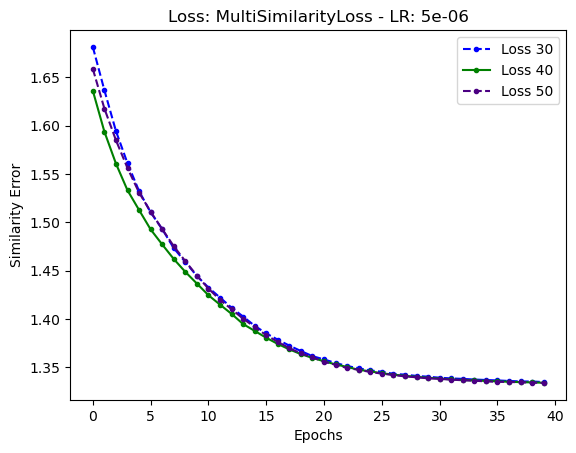

In [406]:
#plt.plot(history.history["loss"], label='Loss 20', color='orange', marker='.', linestyle='dashed')
plt.plot(history2.history["loss"], label='Loss 30', color='blue', marker='.', linestyle='dashed')
#plt.plot(history3.history["loss"], label='Loss 35', color='red', marker='.', linestyle='dashed')
plt.plot(history4.history["loss"], label='Loss 40', color='green', marker='.')
#plt.plot(history5.history["loss"], label='Loss 45', color='yellow', marker='.', linestyle='dashed')
plt.plot(history6.history["loss"], label='Loss 50', color='indigo', marker='.', linestyle='dashed')
#plt.plot(history7.history["loss"], label='Loss 60', color='violet', marker='.', linestyle='dashed')
plt.legend()
plt.title(f"Loss: {loss.name} - LR: {LR}")
plt.xlabel("Epochs")
plt.ylabel("Similarity Error")
plt.show()

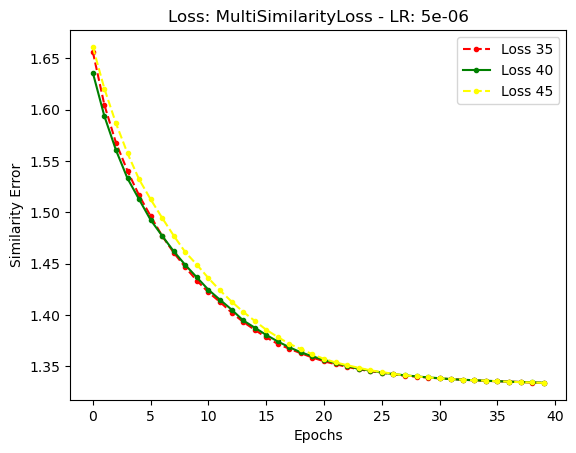

In [407]:
#plt.plot(history.history["loss"], label='Loss 20', color='orange', marker='.', linestyle='dashed')
#plt.plot(history2.history["loss"], label='Loss 30', color='blue', marker='.', linestyle='dashed')
plt.plot(history3.history["loss"], label='Loss 35', color='red', marker='.', linestyle='dashed')
plt.plot(history4.history["loss"], label='Loss 40', color='green', marker='.')
plt.plot(history5.history["loss"], label='Loss 45', color='yellow', marker='.', linestyle='dashed')
#plt.plot(history6.history["loss"], label='Loss 50', color='indigo', marker='.', linestyle='dashed')
#plt.plot(history7.history["loss"], label='Loss 60', color='violet', marker='.', linestyle='dashed')
plt.legend()
plt.title(f"Loss: {loss.name} - LR: {LR}")
plt.xlabel("Epochs")
plt.ylabel("Similarity Error")
plt.show()

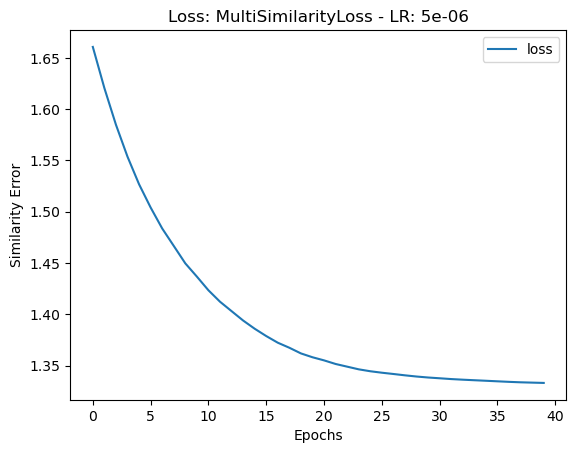

In [137]:
plt.plot(history2.history["loss"])
plt.legend(['loss'])
plt.title(f"Loss: {loss.name} - LR: {LR}")
plt.xlabel("Epochs")
plt.ylabel("Similarity Error")
plt.show()

In [123]:
x_index, y_index = tfsim.samplers.select_examples(tes, y_train, CLASSES, 20)
model4.reset_index()
model4.index(x_index, y_index, data=x_index)

filtering examples:   0%|          | 0/9000000 [00:00<?, ?it/s]

selecting classes:   0%|          | 0/11 [00:00<?, ?it/s]

gather examples:   0%|          | 0/220 [00:00<?, ?it/s]

[Indexing 220 points]
|-Computing embeddings
7/7 [==============================] - 0s 1ms/step
|-Storing data points in key value store
|-Adding embeddings to index.
|-Building index.



0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************


In [124]:
num_neigbors = 5

c_x, c_y = tfsim.samplers.select_examples(tes, y_train, CLASSES, 1)

nns = model4.lookup(c_x, k=num_neigbors)

filtering examples:   0%|          | 0/9000000 [00:00<?, ?it/s]

selecting classes:   0%|          | 0/11 [00:00<?, ?it/s]

gather examples:   0%|          | 0/11 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step

Performing NN search



Building NN list:   0%|          | 0/11 [00:00<?, ?it/s]

In [125]:
[x.distance for x in nns[0]]

[8.20159912109375e-05,
 8.273124694824219e-05,
 0.00010663270950317383,
 0.00011777877807617188,
 0.00012618303298950195]

In [126]:
[x.data[4] for x in nns[0]]

[2.0, 7.0, 4.0, 4.0, 7.0]

#### Calibrate

In [127]:
num_calibration_samples = 10
calibration = model4.calibrate(
    tes[:num_calibration_samples],
    y_train[:num_calibration_samples],
    extra_metrics=['precision', 'recall', 'binary_accuracy'],
    verbose=1,
)

1/1 [==============================] - 0s 15ms/step

Performing NN search



Building NN list:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/4 [00:00<?, ?it/s]


 name        value    distance    precision    recall    binary_accuracy        f1
-------  --------  ----------  -----------  --------  -----------------  --------
optimal  0.666667     1.2e-07            1       0.5                0.1  0.666667


#### Matching

In [128]:
from tabulate import tabulate

In [129]:
num_matches = 20

matches = model4.match(tes[:num_matches], cutpoint="optimal")
rows = []
for idy, match in enumerate(matches):
    rows.append([match, y_train[idy], match == y_train[idy]])
print(tabulate(rows, headers=["Predicted", "Expected", "Correct"]))

1/1 [==============================] - 0s 22ms/step
  Predicted    Expected    Correct
-----------  ----------  ---------
         -1           5          0
         -1           5          0
         -1           3          0
         -1           6          0
         -1           4          0
          3           3          1
         -1           5          0
         -1           5          0
         -1           3          0
         -1           0          0
         -1           6          0
         -1           5          0
          8           7          0
         -1           5          0
         -1           4          0
         -1           5          0
         -1           5          0
         -1           3          0
         -1           5          0
         -1           6          0


filtering examples:   0%|          | 0/9000000 [00:00<?, ?it/s]

selecting classes:   0%|          | 0/11 [00:00<?, ?it/s]

gather examples:   0%|          | 0/11000 [00:00<?, ?it/s]

344/344 [==============================] - 0s 899us/step


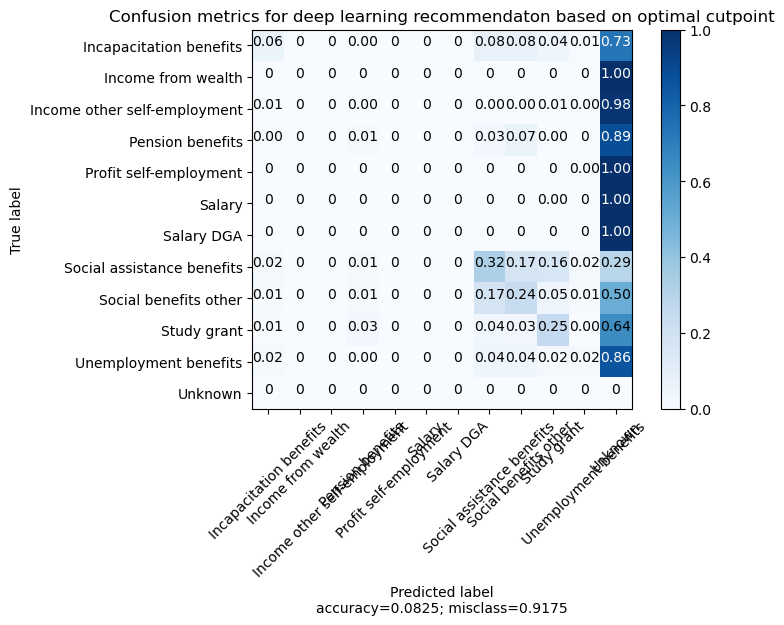

In [130]:
labels = list(LE.inverse_transform(CLASSES)) + ["Unknown"]
num_examples_per_class = 1000
cutpoint = "optimal"

x_confusion, y_confusion = tfsim.samplers.select_examples(tes, y_train, CLASSES, num_examples_per_class)

matches = model4.match(x_confusion, cutpoint=cutpoint, no_match_label=len(CLASSES))
cm = tfsim.visualization.confusion_matrix(
    matches,
    y_confusion,
    labels=labels,
    title="Confusion metrics for deep learning recommendaton based on %s cutpoint" % cutpoint,
)

In [ ]:
list(df_samp.columns)

In [432]:
tesset.columns.get_loc('SMODELRAMINGPENSIOENPREMIEWG')

53

### NN Recommender Evaluation

In [131]:
def get_nn_savings(test_indv, num_neigbors):
    result = []
    nn_search = model4.lookup(np.array(tesset.loc[test_indv]), k=num_neigbors)
    for i in range(len(nn_search)):
        income_percent = [x.data[11] for x in nn_search[i]]
        result.append(0.1 * (sum(income_percent)/float(len(income_percent))))
    return result

In [132]:
 nn_search = model4.lookup(np.array(tesset.loc[test_index]), k=10)

33/33 [==============================] - 0s 936us/step

Performing NN search



Building NN list:   0%|          | 0/1026 [00:00<?, ?it/s]

In [133]:
result = []
for i in range(len(nn_search)):
    income_percent = [x.data[11] for x in nn_search[i]]
    result.append(0.1 * (sum(income_percent)/float(len(income_percent))))

In [134]:
len(result)

1026

In [135]:
recommended = get_nn_savings(test_index, 25)

33/33 [==============================] - 0s 1ms/step

Performing NN search



Building NN list:   0%|          | 0/1026 [00:00<?, ?it/s]

In [144]:
len(income_percent)

1026

In [145]:
data = {
    'Index' : idxx,
    'Income percentage' : income_percent,
    'Pension contribution' : pension_contribution,
    'Recommended saving' : savings,
    'Recommended saving NN' : recommended,
    'Employment' : employment_status
}

In [146]:
df_data = pd.DataFrame(data)

In [147]:
df_data.tail(30)

Index  Income percentage  Pension contribution  Recommended saving  \
10005404    996             3338.1                2536.8            4127.906   
9404130     997             2764.3                1694.7            2407.138   
8931247     998             2236.9                 637.7            2800.244   
6377885     999             1211.9                 732.5            1197.606   
13564574   1000             6651.1                6995.3            8254.874   
2135921    1001            12498.7                9410.1            6711.426   
6687895    1002             3468.5                2932.5            3970.208   
5640690    1003             3878.7                3929.0            4045.928   
1075941    1004             3495.7                4207.3            4855.592   
5034241    1005             3093.0                2140.6            2852.096   
17393808   1006             1699.5                 509.4            2883.278   
7517536    1007             1057.3                 578.8            1545.478   
14774762   1008             1623.4                 307.4            1348.736   
7151512    1009             6814.3                7336.5            8362.152   
6563984    1010             3680.4                3971.5            4022.616   
5857136    1011             2990.4                2670.7            3560.234   
9261607    1012              663.5                 317.6            2459.530   
14978845   1013             4580.0                4103.8            3972.278   
7775623    1014             6339.9                4978.8            7737.800   
3887524    1015             4569.5                3417.0            7119.850   
9656125    1016             3822.4                1320.6            4890.872   
16187042   1017             4194.5                2716.4           10474.182   
6810818    1018             4019.4                3838.9            5614.568   
11663118   1019            26901.3                7351.1           29629.000   
13372147   1020             6363.5                6576.7            5228.652   
14213451   1021            13689.9               18078.1            9736.802   
6703634    1022             7942.2                6266.5            9733.544   
14673834   1023             8320.5                6676.8            8377.484   
7502861    1024             4069.3                1913.2            7191.470   
13910935   1025             5436.4                4115.2            7338.598   

          Recommended saving NN                 Employment  
10005404               1417.144                   Employee  
9404130                2119.392                   Employee  
8931247                3883.240                   Employee  
6377885                1435.904                   Employee  
13564574               2811.696                   Employee  
2135921                3778.484                   Employee  
6687895                3464.820                   Employee  
5640690                2741.836                   Employee  
1075941                3138.532                   Employee  
5034241                2801.412                   Employee  
17393808               1075.748                   Employee  
7517536                1996.288        Student with income  
14774762               1047.528                   Employee  
7151512                2665.708                   Employee  
6563984                2431.248                   Employee  
5857136                1413.964                   Employee  
9261607                1788.800                   Employee  
14978845               1689.464                   Employee  
7775623                2836.016                   Employee  
3887524                2801.412                   Employee  
9656125                3260.392                   Employee  
16187042               1791.568                   Employee  
6810818                2104.424                   Employee  
11663118               2502.988                   Employee  
1337

In [148]:
grp = df_data.groupby("Employment", group_keys=True)# .apply(lambda x: x)

In [149]:
grp.groups.keys()

dict_keys(['Co-working family member', 'Director-majorshareholder', 'Employee', 'Receiver incapacitated benefit', 'Receiver pension benefit', 'Receiver social assistance benefit', 'Receiver social benefit other', 'Receiver unemployment benefit', 'Self-employed', 'Self-employed other', 'Student with income', 'Student without income', 'Without income other'])

/tmp/ipykernel_2300/4253591510.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["Index"] = list(range(len(dff)))
/tmp/ipykernel_2300/4253591510.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["Index"] = list(range(len(dff)))
/tmp/ipykernel_2300/4253591510.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

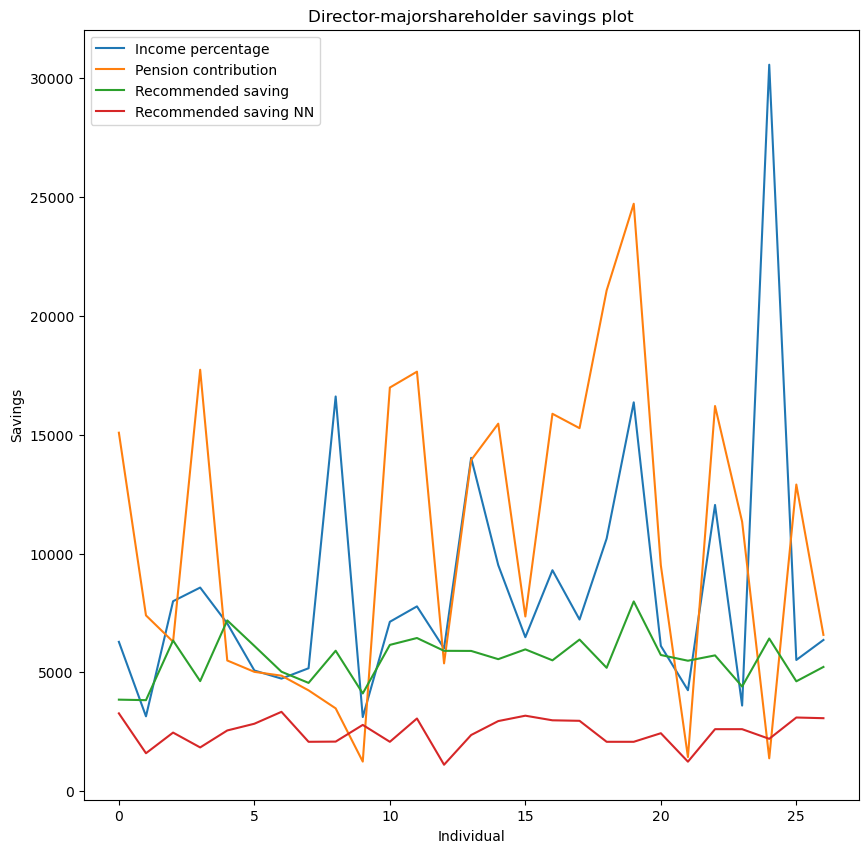

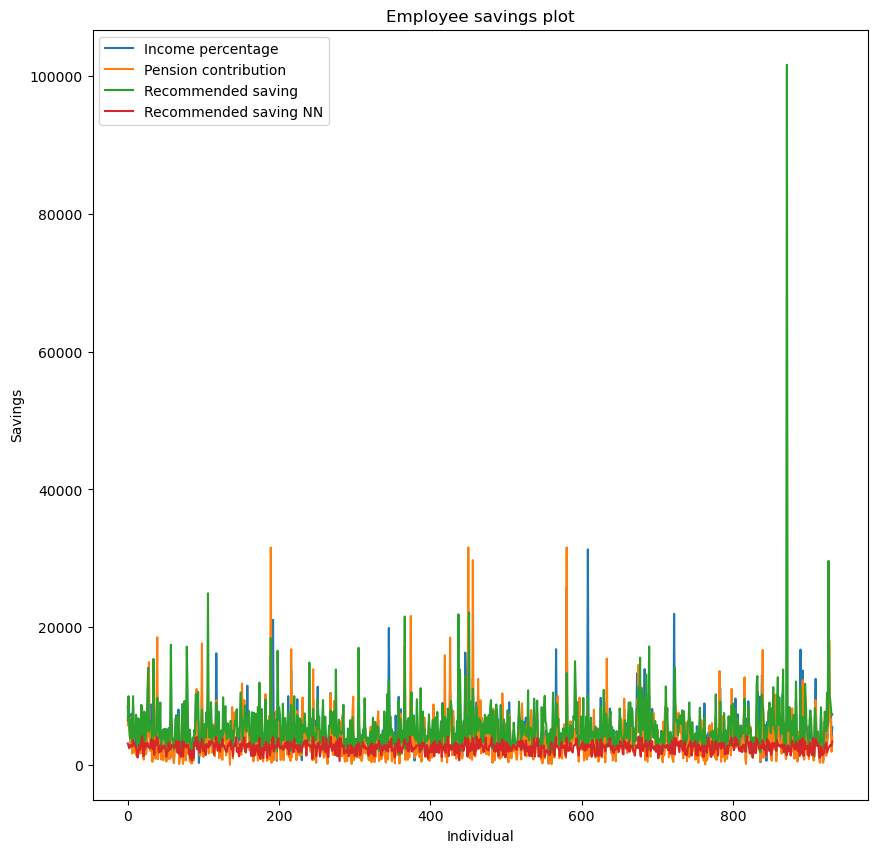

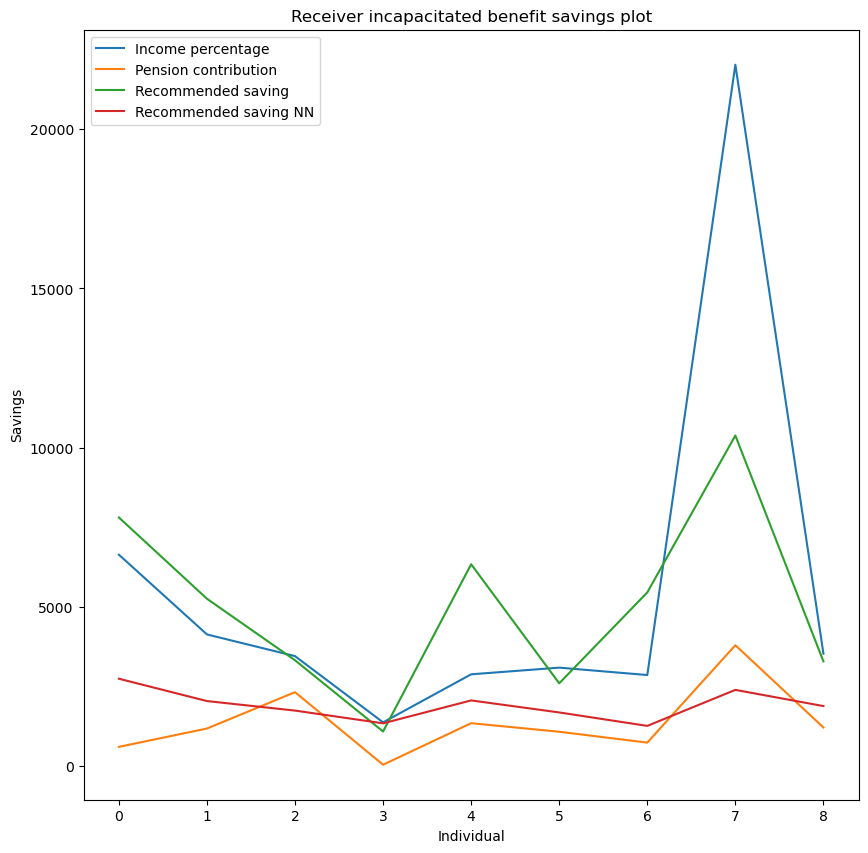

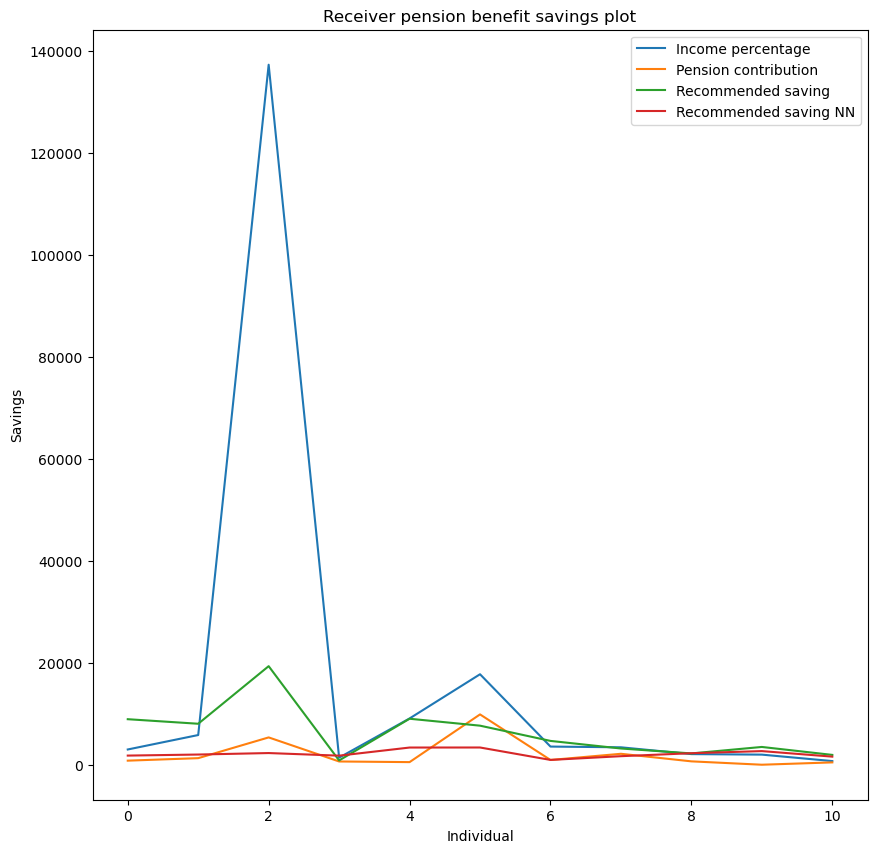

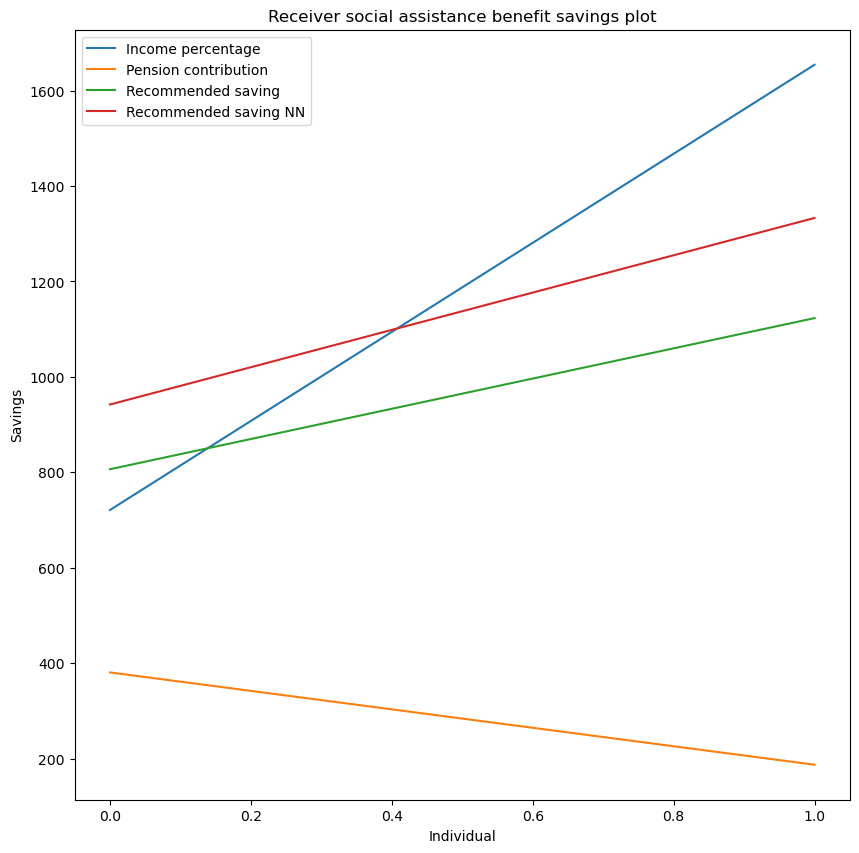

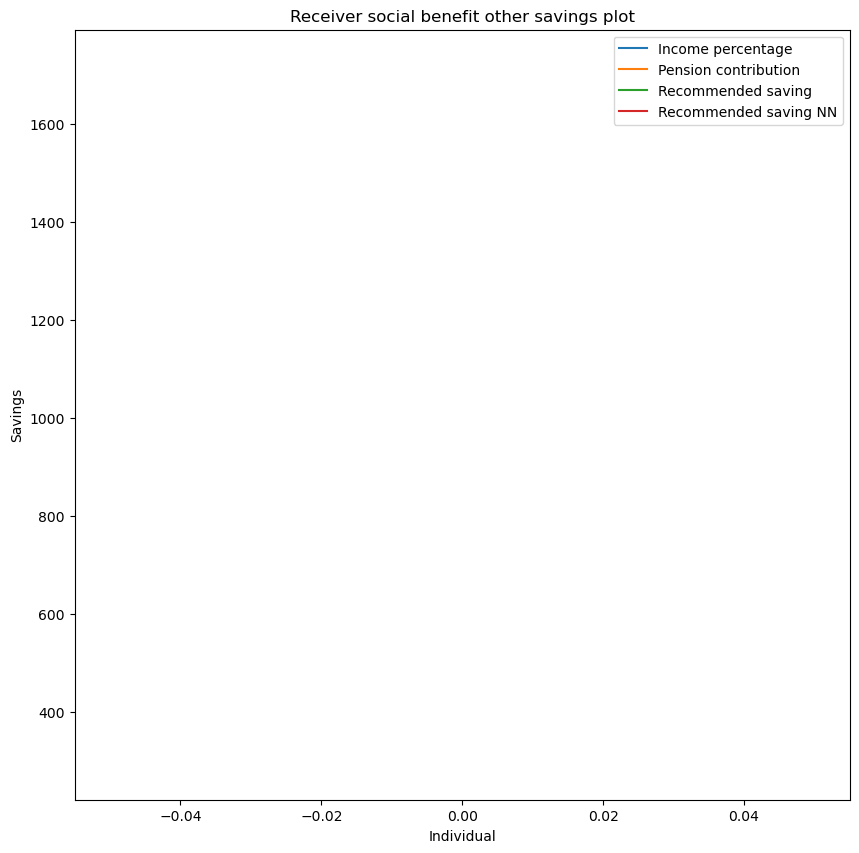

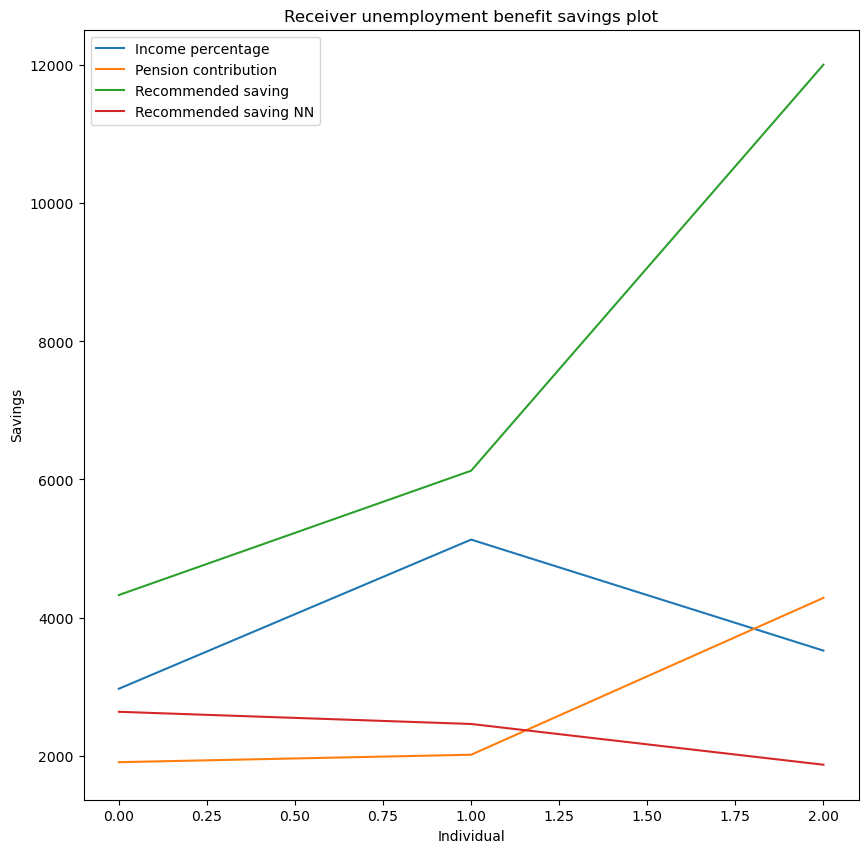

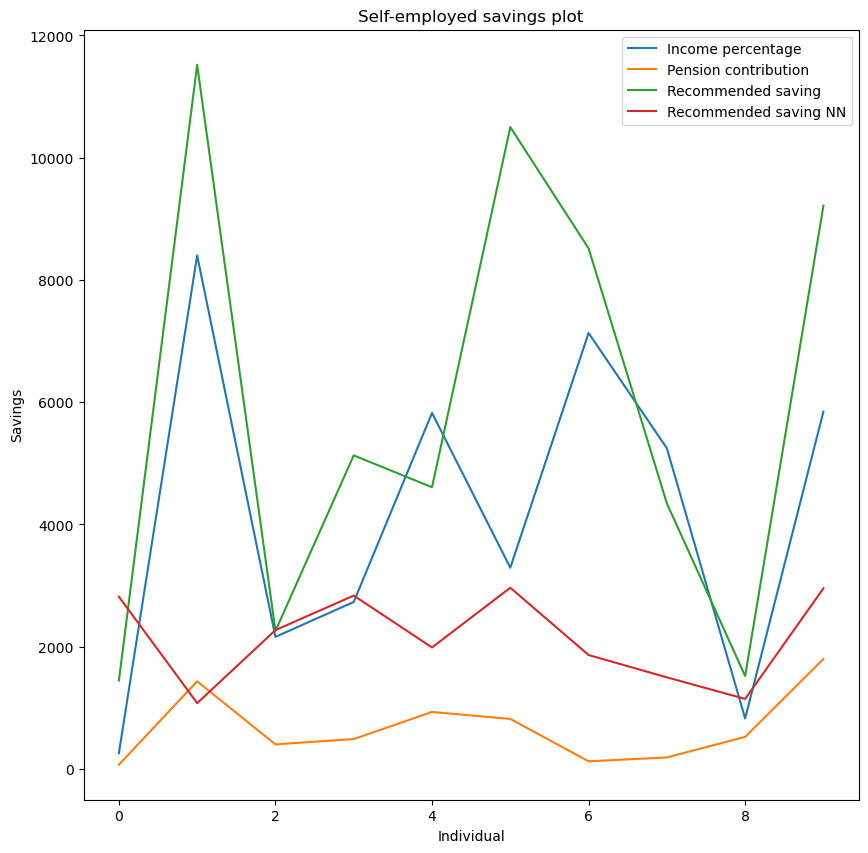

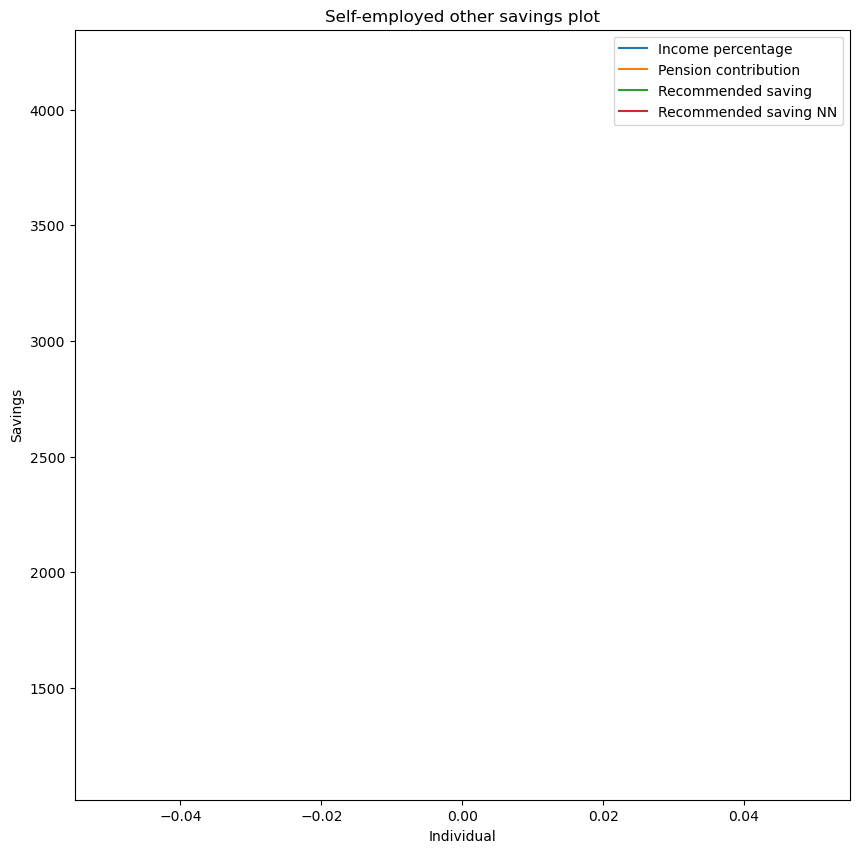

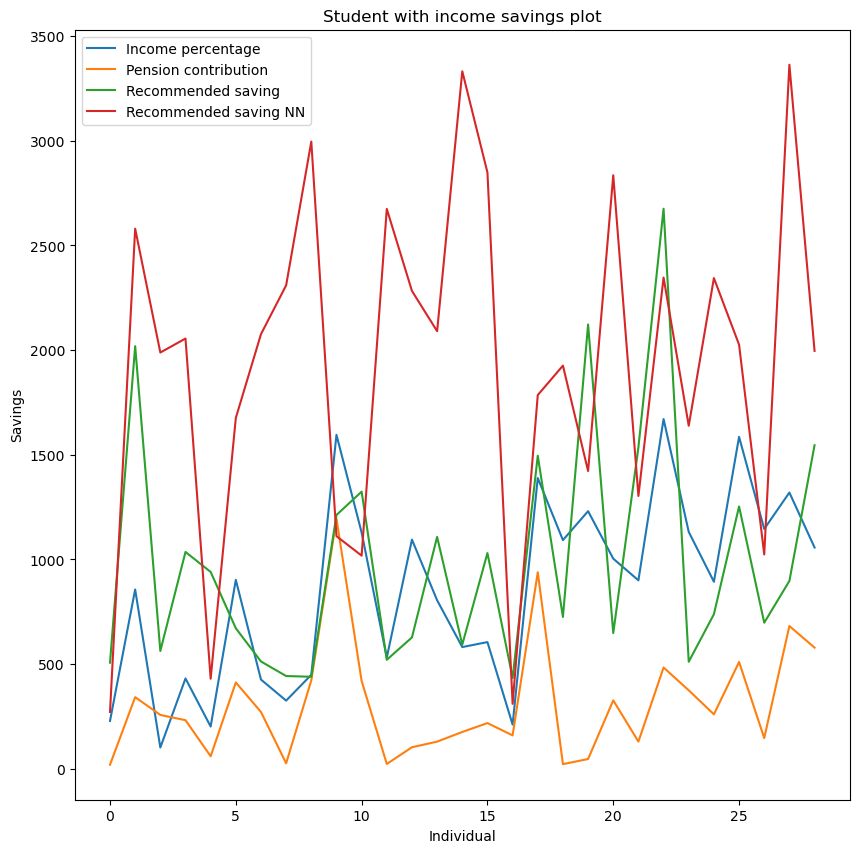

In [150]:
for agrp in grp.groups.keys():
    if agrp=='Student without income' or agrp=='Without income other' or agrp=='Co-working family member': continue
    dff = grp.get_group(agrp)
    dff["Index"] = list(range(len(dff)))
    dff.plot(x="Index", y=['Income percentage', 'Pension contribution', 'Recommended saving', 'Recommended saving NN'], kind='line', figsize=(10,10), title=agrp+" savings plot", xlabel="Individual", ylabel="Savings")

<Axes: xlabel='Index'>

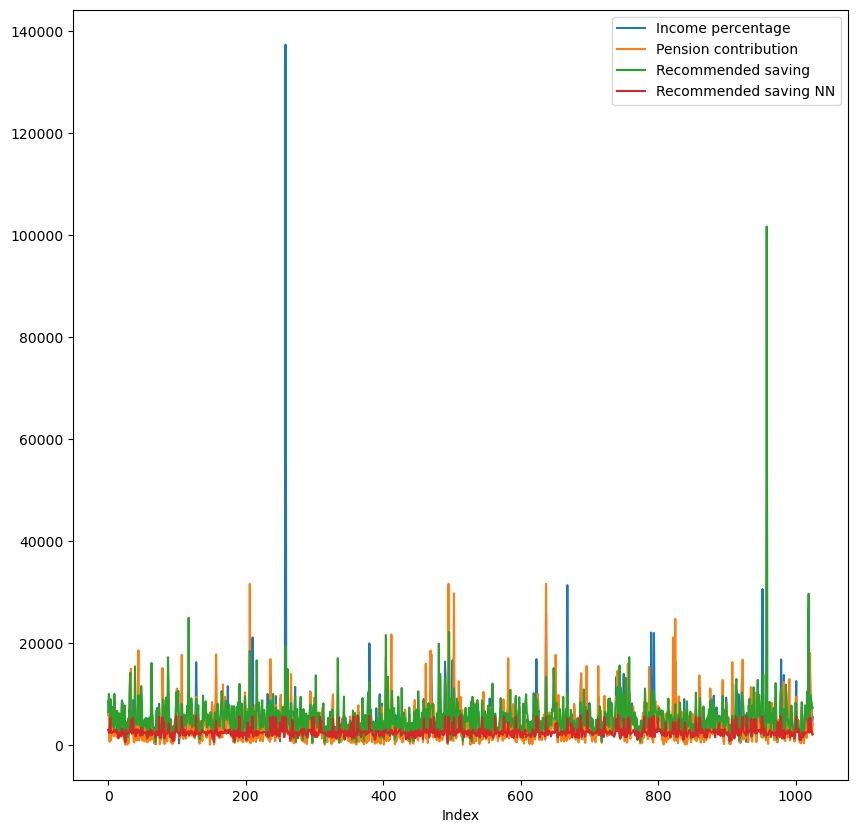

In [493]:
df_data.plot(x="Index", y=['Income percentage', 'Pension contribution', 'Recommended saving', 'Recommended saving NN'], kind='line', figsize=(10,10))

<Axes: xlabel='Index'>

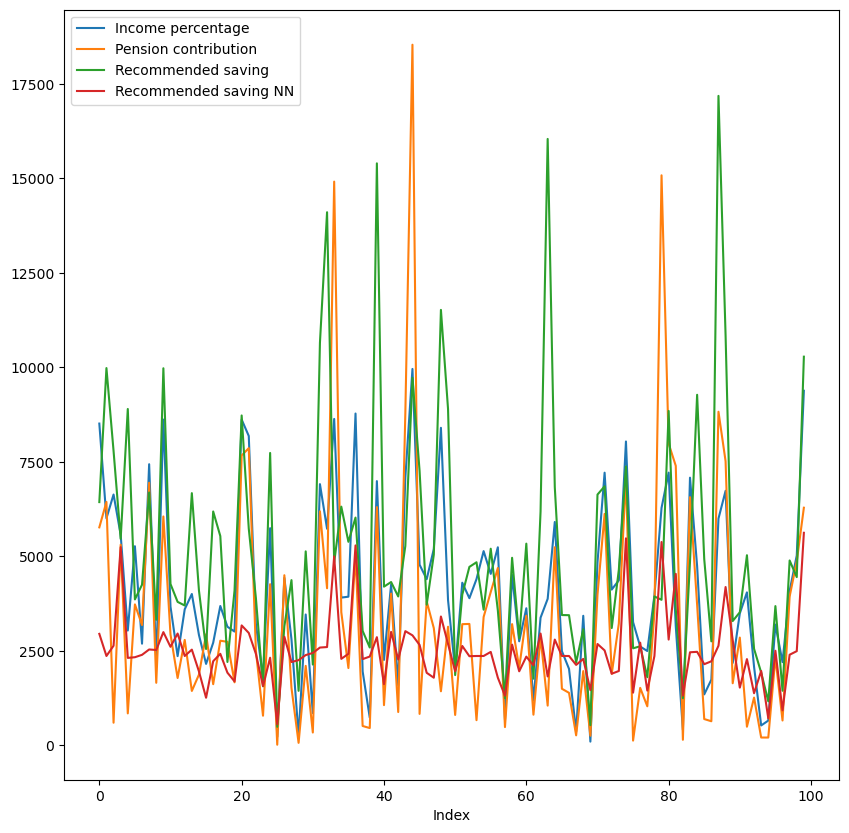

In [494]:
df_data[:100].plot(x="Index", y=['Income percentage', 'Pension contribution', 'Recommended saving', 'Recommended saving NN'], kind='line', figsize=(10,10))

In [ ]:
recommended

### Combination of pipeline results based on province, employment status, income type and occupation

In [138]:
province_dictionary = {}
provinces = ['Groningen', 'Friesland', 'Drenthe', 'Overijssel', 'Flevoland', 'Gelderland', 'Utrecht', 'North-Holland', 'South-Holland', 'Zeeland', 'North-Brabant', 'Limburg']

In [139]:
for i in range(0,12):
    province_dictionary[provinces[i]] = i  + 20

In [140]:
province_dictionary

{'Groningen': 20,
 'Friesland': 21,
 'Drenthe': 22,
 'Overijssel': 23,
 'Flevoland': 24,
 'Gelderland': 25,
 'Utrecht': 26,
 'North-Holland': 27,
 'South-Holland': 28,
 'Zeeland': 29,
 'North-Brabant': 30,
 'Limburg': 31}

#### According to Traditional

In [141]:
tradd = plr.from_pandas(df_samp)

In [142]:
tdin1 = "INPSECJ_"+"Employee"
tdin2 = "INHBBIHJ_"+"Salary"
tdin3 = "PROVINCIE_"+str(province_dictionary["Utrecht"])
tdin4 = "INPPERSINK"

In [143]:
all_similar = tradd.filter((plr.col(tdin1)==1) &
           (plr.col(tdin2)==1) &
           (plr.col(tdin3)==1) )
             )

In [144]:
del tradd

In [145]:
similars_mean = all_similar.mean()
similars_median = all_similar.median()

In [146]:
neighborss, distancess = searcher.search(similars_mean.row(0), final_num_neighbors=40)

In [147]:
q_df = df_samp_bac.iloc[neighborss, :]
q_df['distance'] = list(distancess)
#q_df['distance']

/tmp/ipykernel_32664/1633118464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_df['distance'] = list(distancess)


In [148]:
q_df[['INPPERSINK', 'INHBBIHJ', "INPSECJ", 'PROVINCIE']]

INPPERSINK INHBBIHJ   INPSECJ PROVINCIE
2629922     164917.0   Salary  Employee        26
1369922     205878.0   Salary  Employee        26
16125623    321876.0   Salary  Employee        26
401730      213028.0   Salary  Employee        26
8357424     228745.0   Salary  Employee        26
2045839     121192.0   Salary  Employee        26
15031043    174462.0   Salary  Employee        26
6173359     248111.0   Salary  Employee        26
13346131    154605.0   Salary  Employee        26
14386392    195473.0   Salary  Employee        26
7168928     102935.0   Salary  Employee        26
10596975     97062.0   Salary  Employee        26
5007700      86643.0   Salary  Employee        26
5882954     159761.0   Salary  Employee        26
5547581     137485.0   Salary  Employee        26
8775032     195213.0   Salary  Employee        26
2176432     193474.0   Salary  Employee        26
11196075    102809.0   Salary  Employee        26
12745154     99864.0   Salary  Employee        26
6955497     151577.0   Salary  Employee        26
4639652     213168.0   Salary  Employee        26
16695782    268653.0   Salary  Employee        26
3487417     132310.0   Salary  Employee        26
7137548      87820.0   Salary  Employee        26
1703007     269279.0   Salary  Employee        26
15623025    158645.0   Salary  Employee        26
7292321     226959.0   Salary  Employee        26
1670522     200272.0   Salary  Employee        26
8288760     248020.0   Salary  Employee        26
4289033     248350.0   Salary  Employee        26
13162029    161347.0   Salary  Employee        26
11944190    177537.0   Salary  Employee        26
11241047    242937.0   Salary  Employee        26
4003061      93095.0   Salary  Employee        26
38687       193307.0   Salary  Employee        26
14488692    161026.0   Salary  Employee        26
5870847     102614.0   Salary  Employee        26
295494      186577.0   Salary  Employee        26
5096743     156983.0   Salary  Employee        26
1431355     115572.0   Salary  Employee        26

In [149]:
q_df[q_df['INPPERSINK']<100000]['INPPERSINK']

10596975    97062.0
5007700     86643.0
12745154    99864.0
7137548     87820.0
4003061     93095.0
Name: INPPERSINK, dtype: float64

In [150]:
to_be_saved_trad = 0.1 * q_df[q_df['INPPERSINK']<100000]['INPPERSINK'].mean()

#### According to NN

In [220]:
encoders['le_INPSECJ'].transform(["Self-employed"])[0]

8

In [221]:
encoders

{'le_GBABURGSTNWKLASSE4': LabelEncoder(),
 'le_INPSECJ': LabelEncoder(),
 'le_INPPINK': LabelEncoder(),
 'le_TYPHH': LabelEncoder(),
 'le_PLHH': LabelEncoder(),
 'le_INHSAMHH': LabelEncoder(),
 'le_INHEHALGR': LabelEncoder(),
 'le_CTO2016V': LabelEncoder(),
 'le_SMODELRAMINGPF': LabelEncoder(),
 'le_INPPOSHHK': LabelEncoder(),
 'le_INHPOPIIV': LabelEncoder(),
 'le_OPLNIVSOI2016AGG1HB': LabelEncoder(),
 'le_STEDBUURT': LabelEncoder(),
 'le_INPT1068ZVW': LabelEncoder(),
 'le_MAINBREADWINNER': LabelEncoder(),
 'le_AANTALKINDHH': LabelEncoder(),
 'le_HOMEOWNER': LabelEncoder(),
 'le_INPPN400WW': LabelEncoder(),
 'le_SBI2008VJJJJ': LabelEncoder(),
 'le_SBISELFEMPLOYED': LabelEncoder(),
 'le_SBI2008VPBL38': LabelEncoder(),
 'le_PROVINCIE': LabelEncoder(),
 'le_STEDGEM': LabelEncoder(),
 'le_G4': LabelEncoder(),
 'le_LANDSDEEL': LabelEncoder()}

In [151]:
in1 = encoders['le_INPSECJ'].transform(["Self-employed"])[0]
in2 = LE.transform(["Salary"])[0]
in3 = encoders['le_PROVINCIE'].transform([province_dictionary["Utrecht"]])[0]

In [152]:
tesset['INHBBIHJ'] = y_train

In [153]:
tessey = plr.from_pandas(tesset)

In [154]:
all_similar = tessey.filter((plr.col("INPSECJ")==in1) &
           (plr.col('INHBBIHJ')==in2) &
           (plr.col('PROVINCIE')==in3)
             )

In [155]:
del tessey

In [156]:
all_similar = all_similar.drop('INHBBIHJ')

In [157]:
similars_mean = all_similar.mean()
similars_median = all_similar.median()

In [158]:
s = similars_mean.to_numpy()

In [160]:
nn_search = model2.lookup(s, k=40)

1/1 [==============================] - 0s 28ms/step

Performing NN search



Building NN list:   0%|          | 0/1 [00:00<?, ?it/s]

In [161]:
## Out of all similars count the number of individuals of different income types recommended by NN
lab_counts = {}
income_values = {}
for label in nn_search[0]:
    if label.label in lab_counts:
        lab_counts[label.label] = lab_counts[label.label] + 1
        # check and remove individuals with 0 income value
        if not label.data[11] == 0: income_values[label.label] =  income_values[label.label] + [label.data[11]]
    else:
        lab_counts[label.label] = 1
        if label.data[11] == 0: income_values[label.label] = []
        else: income_values[label.label] = [label.data[11]]

In [162]:
lab_counts

{4: 12, 5: 11, 2: 4, 6: 6, 8: 1, 10: 4, 1: 1, 0: 1}

In [260]:
for s in CLASSES:
    print(s, LE.inverse_transform([s]))

0 ['Incapacitation benefits']
1 ['Income from wealth']
2 ['Income other self-employment']
3 ['Pension benefits']
4 ['Profit self-employment']
5 ['Salary']
6 ['Salary DGA']
7 ['Social assistance benefits']
8 ['Social benefits other']
9 ['Study grant']
10 ['Unemployment benefits']


In [163]:
similar = [kv[0] for kv in lab_counts.items() if kv[1] == max(lab_counts.values())]

In [171]:
similar = [kv[0] for kv in lab_counts.items() if kv[1] > 1]

In [249]:
from operator import itemgetter
sublist = [kv for kv in lab_counts.items() if kv[1] < max(lab_counts.values())]
sublist

[(5, 7), (6, 2), (2, 3), (3, 6), (10, 5), (8, 2), (0, 2), (1, 2)]

In [250]:
found = max(sublist, key=itemgetter(1))[1]

In [251]:
similar = similar + [kv[0] for kv in sublist if kv[1] == found]

In [172]:
similar

[4, 5, 2, 6, 10]

In [253]:
LE.inverse_transform(similar)

array(['Profit self-employment', 'Salary'], dtype=object)

In [170]:
list(filter(lambda x: x <100000, income_values[similar[0]]))

[97664.0, 90485.0, 58707.0, 500.0, 58930.0]

In [173]:
import statistics as sat
valid_income_set = []
for x in similar:
    valid_income_set.append(sat.mean(income_values[x]))
to_be_saved_NN = sat.mean(valid_income_set) * 0.1

#### Amount to be saved is 10% of the average income of these "So-called" similar people

In [174]:
import decimal
decimal.getcontext().prec = 6
## the NN is very conservative and has been given a weight of 0.9 for a very conservative overal system
## The traditional model is less conservative and more biased towards higher salary amounts  
to_be_saved = decimal.Decimal(0.9 * to_be_saved_NN) + decimal.Decimal(0.1 * to_be_saved_trad)

In [175]:
print(f"The Amount to be saved is {to_be_saved} Euros per year")

The Amount to be saved is 5986.67 Euros per year


In [178]:
for col in num_features:
    if col == 'MAINBREADWINNER' or col == 'HOMEOWNER': key = col+'2019'
    elif col == 'RINPERSOON' or col == 'risk_prefrence' : continue
    else: key = col+'2020'
    #val = len(df_samp_bac[col].unique())
    print(f"{col} --> {dictionary[key]}")

INPPN700PEN --> Contribution Pension Employee (2nd pillar)
INPPG710PEN --> Contribution Pension Employer (2nd pillar)
INPPH770OUP --> Contribution Private Insurance Old Age (3rd pillar)
INPPH570ZWP --> Contribution Private Insurance Incapacitation
INPPERSPRIM --> Income IND Personal Primary
INPPERSINK --> Income IND Personal
INPPERSBRUT --> Income IND Personal Before-Tax
INPT2070WIN --> Income IND Self-Employment
INPT1060OVE --> Income IND Other Labour
INPT1040NAT --> Income IND in Kind
INPT1030DGN --> Income IND Director-Majorshareholder (DGA)
INPT1020AMB --> Income IND Civil Servant
INPT1000WER --> Income IND employment
INPPG610WAO --> Contribution Incapacitation Benefit Employer
INPPG410WW --> Contribution Unemployment Benefit Employer
AANTALPERSHH --> HH Size
VEHWVEREXEWH --> Wealth HH Total Excluding House
VEHW1000VERH --> Wealth HH Total (1)
VEHW1100BEZH --> Wealth HH Posessions (1.1)
VEHW1110FINH --> Wealth HH Financial Possessions (1.1.1)
VEHW1111BANH --> Wealth HH Bank and Sav

## GUI

In [495]:
from streamlit_jupyter import StreamlitPatcher, tqdm

In [496]:
StreamlitPatcher().jupyter()

In [497]:
stlit.title('Pension recommendation App')

# Pension recommendation App

In [498]:
employment_status = stlit.selectbox(
                    'Select your employment status',
                    ('Self-employed',
                     'Employee',
                     'Student with income',
                     'Student without income',
                     'Receiver pension benefit',
                     'Without income other',
                     'Receiver social assistance benefit',
                     'Director-majorshareholder',
                     'Receiver unemployment benefit',
                     'Receiver social benefit other',
                     'Receiver incapacitated benefit',
                     'Co-working family member',
                     'Self-employed other')
)
income_source = stlit.selectbox(
                'Select your income source',
                ('Salary',
                 'Income from wealth',
                 'Pension benefits',
                 'Profit self-employment',
                 'Social assistance benefits',
                 'Salary DGA',
                 'Unemployment benefits',
                 'Social benefits other',
                 'Incapacitation benefits',
                 'Study grant',
                 'Income other self-employment')
)
income_range = stlit.selectbox(
                'Select your income range',
                ('Less than or equal to 20,000 Euros', '20,000 to 100,000 Euros', 'Greater than 100,000 Euros')
)
province = stlit.selectbox(
            'Select your province in the Netherlands',
            ('Groningen', 'Friesland', 'Drenthe', 'Overijssel', 'Flevoland', 'Gelderland', 'Utrecht', 'North-Holland', 'South-Holland', 'Zeeland', 'North-Brabant', 'Limburg')
)

Dropdown(description='Select your employment status', options=('Self-employed', 'Employee', 'Student with inco…

Dropdown(description='Select your income source', options=('Salary', 'Income from wealth', 'Pension benefits',…

Dropdown(description='Select your income range', options=('Less than or equal to 20,000 Euros', '20,000 to 100…

Dropdown(description='Select your province in the Netherlands', options=('Groningen', 'Friesland', 'Drenthe', …

In [181]:
if not employment_status or not income_source or not income_range or not province:
    stlit.error("Please fill in all questions first.")
else:
    stlit.write(f'#### We recommend you to save {to_be_saved} Euros per year given that most people that are similar to you can afford to save this as a minimum for retirement savings.')

#### We recommend you to save 5986.67 Euros per year given that most people that are similar to you can afford to save this as a minimum for retirement savings.